<a href="https://colab.research.google.com/github/laym0ura/projetos_ciencia_de_dados/blob/main/Decifrando_a_Fertilidade_de_Zirc%C3%B5es_com_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Decifrando a Fertilidade de Zircões com Machine Learning


##**ARTIGO DE REFERÊNCIA**

**Título:** Machine Learning and Singularity Analysis Reveal Zircon Fertility and Magmatic Intensity: Implications for Porphyry Copper Potential

**Publicação:** Natural Resources Research, Outubro de 2022

**DOI:** 10.1007/s11053-022-10122-y

**Autores principais:** Yuanzhi Zhou, Zhenjie Zhang, Jie Yang, Qiuming Cheng

O artigo completo pode ser consultado [aqui](https://www.researchgate.net/publication/364253642_Machine_Learning_and_Singularity_Analysis_Reveal_Zircon_Fertility_and_Magmatic_Intensity_Implications_for_Porphyry_Copper_Potential).

#IMPORTAÇÃO DAS BIBLIOTECAS NECESSÁRIAS


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve, auc, f1_score
import geopandas as gpd
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##LENDO O ARQUIVO

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/minicurso_geosudeste/Table S1.xlsx", header = 2)

In [ ]:
df

,No.,Area,Location,Latitude (°),Longitude (°),Spot No.,Description,Fertility,Tectonic setting,Age (Ma),2σ,Reference,P (ppm),Ti (ppm),Fe (ppm),Zr (ppm),Rb (ppm),Y (ppm),Nb (ppm),Ba (ppm),La (ppm),Ce (ppm),Pr (ppm),Nd (ppm),Sm (ppm),Eu (ppm),Gd (ppm),Tb (ppm),Dy (ppm),Ho (ppm),Er (ppm),Tm (ppm),Yb (ppm),Lu (ppm),Hf (ppm),Th (ppm),U (ppm),Ta (ppm),Pb (Total),Th/U,Eu/Eu*,Ce/Nd,(Ce/Nd)/Y,Dy/Yb,10000Eu/Eu*/Y
0,1,Tibet,Yulong porphyry copper deposit,97.75,31.38,YL1647-1,Mozongranite,Fertile,Collision-related,41.910613,0.521603,Huang et al. 2019,NaN,1.822467,NaN,NaN,NaN,531.445110,2.064281,NaN,0.002903,32.283959,0.048356,1.147523,1.977964,0.971401,10.255406,3.186231,37.156557,14.790350,71.906125,16.907622,186.951526,42.754488,10204.751382,746.060064,1540.228299,0.610750,NaN,0.484383,0.657449,28.133600,0.052938,0.198750,12.370966
1,2,Tibet,Yulong porphyry copper deposit,97.75,31.38,YL1647-3,Mozongranite,Fertile,Collision-related,41.871949,0.455309,Huang et al. 2019,NaN,4.782681,NaN,NaN,NaN,810.877595,2.852243,NaN,0.170981,49.863987,0.140301,1.866323,3.519773,1.539417,18.067920,5.728992,66.135874,24.896719,114.469104,25.268670,249.874155,52.384573,8868.713722,295.820760,534.589995,0.974983,NaN,0.553360,0.588429,26.717769,0.032949,0.264677,7.256690
2,3,Tibet,Yulong porphyry copper deposit,97.75,31.38,YL1647-4,Mozongranite,Fertile,Collision-related,42.117275,0.452928,Huang et al. 2019,NaN,2.214091,NaN,NaN,NaN,571.283568,1.955251,NaN,0.000626,26.378716,0.031944,0.667862,1.872852,0.844834,9.827545,3.086908,38.141718,15.574309,78.837618,19.020161,205.644381,49.104114,10095.240566,587.637152,1650.786963,0.649710,NaN,0.355974,0.600269,39.497277,0.069138,0.185474,10.507376
3,4,Tibet,Yulong porphyry copper deposit,97.75,31.38,YL1647-5,Mozongranite,Fertile,Collision-related,42.044877,0.603113,Huang et al. 2019,NaN,2.530211,NaN,NaN,NaN,576.906266,2.026739,NaN,0.165871,28.986758,0.083528,0.866020,1.828567,0.951642,10.861535,3.271429,39.216247,15.710574,78.441752,19.131501,207.620307,48.535056,10293.496426,601.742009,1637.346370,0.629362,NaN,0.367511,0.650911,33.471251,0.058019,0.188884,11.282784
4,5,Tibet,Yulong porphyry copper deposit,97.75,31.38,YL1647-7,Mozongranite,Fertile,Collision-related,41.832244,0.549302,Huang et al. 2019,NaN,1.770853,NaN,NaN,NaN,461.341206,1.679597,NaN,0.033809,23.269734,0.053626,0.524212,1.441013,0.574004,7.607420,2.386598,29.184160,12.477338,64.083194,16.165163,183.317121,44.865926,10461.499152,457.676209,1500.217500,0.529517,NaN,0.305073,0.528459,44.389965,0.096219,0.159200,11.454846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,895,USA,Yellowstone,-110.00,44.00,12043-36,Rhyolite,Unfertile,Superplume-related,1.088737,0.668793,Troch et al. 2018,361.192793,5.876438,NaN,NaN,NaN,1329.755279,NaN,NaN,0.049052,27.466699,0.083082,1.606400,3.568293,0.164079,22.630262,9.128244,109.591733,44.462868,198.150028,41.499673,370.006590,79.140246,12200.785844,169.065369,311.648955,NaN,NaN,0.542487,0.055658,17.098296,0.012858,0.296189,0.418557
895,896,USA,Yellowstone,-110.00,44.00,12043-37,Rhyolite,Unfertile,Superplume-related,NaN,0.000000,Troch et al. 2018,200.311971,3.983888,NaN,NaN,NaN,1271.181133,NaN,NaN,0.029207,15.766888,0.047729,1.070933,2.470592,0.115481,18.534179,8.458630,101.479289,42.801043,182.432949,40.328871,332.005461,74.042723,12541.209556,88.123708,228.428986,NaN,NaN,0.385782,0.052020,14.722569,0.011582,0.305655,0.409226
896,897,USA,Yellowstone,-110.00,44.00,12043-37,Rhyolite,Unfertile,Superplume-related,0.7432,0.361120,Troch et al. 2018,355.442417,5.824125,NaN,NaN,NaN,1348.996172,NaN,NaN,0.022416,27.165847,0.085278,1.324653,3.044265,0.223794,21.471204,8.941494,111.558386,43.677869,195.028142,44.505399,352.718970,74.795811,12391.423123,175.792552,322.133360,NaN,NaN,0.545714,0.084378,20.507898,0.015202,0.316281,0.625485
897,898,USA,Yellowstone,-110.00,44.00,12043-39,Rhyolite,Unferti

#ANÁLISE EXPLORATÓRIA DOS DADOS

##**FUNÇÃO INFO**

A **função info()** é usada para obter um resumo conciso de um DataFrame. Aqui está o que ela faz, resumidamente:

**Tipo de Dados:** Ela exibe a classe do objeto (geralmente um DataFrame).

**Entradas (linhas) e colunas:** Informa o número de linhas e colunas.

**Uso de memória:** Mostra a quantidade aproximada de memória RAM usada para armazenar o DataFrame.

**Tipo de cada coluna:** Apresenta uma lista de todas as colunas com seus respectivos tipos de dados.

**Valores não-nulos:** Para cada coluna, informa quantos valores não são nulos.

**Nome das colunas:** Mostra os nomes das colunas.

Ao chamar a função info(), você obtém uma visão geral rápida sobre a estrutura e o armazenamento de um DataFrame, que é muito útil para entender os seus dados antes de começar qualquer análise ou manipulação.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   No.               899 non-null    int64  
 1   Area              899 non-null    object 
 2   Location          899 non-null    object 
 3   Latitude (°)      899 non-null    float64
 4   Longitude (°)     899 non-null    float64
 5   Spot No.          899 non-null    object 
 6   Description       899 non-null    object 
 7   Fertility         899 non-null    object 
 8   Tectonic setting  899 non-null    object 
 9   Age (Ma)          885 non-null    object 
 10  2σ                855 non-null    float64
 11  Reference         899 non-null    object 
 12  P (ppm)           414 non-null    float64
 13  Ti (ppm)          643 non-null    object 
 14  Fe (ppm)          162 non-null    object 
 15  Zr (ppm)          175 non-null    float64
 16  Rb (ppm)          64 non-null     float64
 1

##**LOCALIZAÇÃO DAS AMOSTRAS**


###**FUNÇÃO UNIQUE**

A função unique() é usada para encontrar valores únicos de uma série ou coluna de um DataFrame.

In [ ]:
df['Location'].unique()

array(['Yulong porphyry copper deposit',
       'Demingding porphyry Cu‐Mo deposit',
       'Sungun porphyry copper deposit', 'Qulong porphyry copper deposit',
       'Jiama porphyry copper deposit',
       'Sar Cheshmeh porphyry copper deposit', 'Batu Hijau', 'Tampakan',
       'El Teniente', 'Chuquicamata', 'Mirador', 'Esperanza', 'Escondida',
       'Pajonal-El Abra', 'Chuquicamata ', 'Anatolide-Tauride Block',
       'Chanang', 'Sangri ', 'Bishop', 'Los Picos-Fortuna', 'Yellowstone'],
      dtype=object)

A partir dos resultados obtidos, é possível identificar que há 21 locais distintos na coluna "Location" do conjunto de dados.

###**PLOTANDO AS LOCALIZAÇÕES NO MAPA MUNDI**

**Transformando os dados nas colunas "Latitude (°)" e "Longitude (°)" para que sejam do tipo float.**

O tipo float é um tipo de dado numérico que pode representar números reais, ou seja, números que possuem uma parte inteira e uma parte fracionária.




In [ ]:
df["Latitude (°)"] = df["Latitude (°)"].astype(float)
df["Longitude (°)"] = df["Longitude (°)"].astype(float)

O código abaixo usa a biblioteca Geopandas para ler um arquivo de mapa mundi de baixa resolução. Ele armazena esse mapa em uma variável chamada world, que é um GeoDataFrame.

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

<ipython-input-9-1902369eb8ba>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


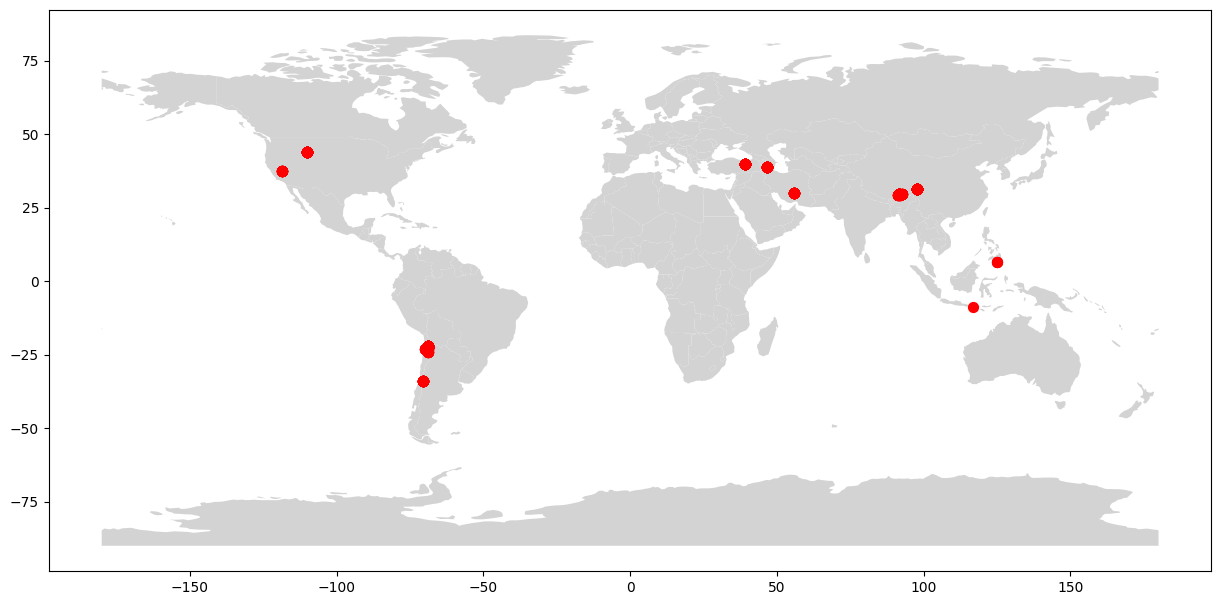

In [ ]:
# Inicializando a figura e os eixos para o gráfico, definindo o tamanho da figura como 15x10 polegadas
fig, ax = plt.subplots(figsize=(15,10))

# Plotando o mapa mundi no fundo, usando cores cinzas claras para os países
world.plot(ax=ax, color='lightgray')

# Adicionando pontos de dados de latitude e longitude do DataFrame "dado" para o gráfico.
# Os pontos são coloridos de vermelho e têm um tamanho de 50.
ax.scatter(df["Latitude (°)"], df["Longitude (°)"], color='red', s=50)

# Mostrando o gráfico completo
plt.show()


## **FILTRANDO OS DADOS**



Nesta etapa, realizaremos a filtragem dos dados de acordo com as diretrizes estabelecidas no artigo de referência. O objetivo é preparar os dados para o treinamento do modelo de Machine Learning.

**Características de Entrada e Saída**

**Entrada:** As características de entrada escolhidas são composições de oligoelementos de zircões ígneos. Os oligoelementos selecionados para o treinamento do modelo são Ce, Pr, Nd, Sm, Eu, Gd, Tb, Dy, Ho, Er, Tm, Yb, Lu, Hf, Th e U.

**Saída:** A característica de saída é a "fertilidade do zircão", que pode ser classificada como 'fértil' ou 'não fértil'.

**Justificativa**
A escolha dessas características foi baseada em estudos anteriores e literatura relevante que exploram zircões ígneos e detríticos. Essas características são frequentemente relatadas como indicadores importantes e, portanto, foram selecionadas para o processo de treinamento do modelo.

In [ ]:
dados_artigo = df[['Ce (ppm)', 'Pr (ppm)', 'Nd (ppm)', 'Sm (ppm)', 'Eu (ppm)', 'Gd (ppm)', 'Tb (ppm)', 'Dy (ppm)', 'Ho (ppm)', 'Er (ppm)', 'Tm (ppm)','Yb (ppm)', 'Lu (ppm)',  'Hf (ppm)', 'Th (ppm)', 'U (ppm)', 'Fertility']]

In [ ]:
dados_artigo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ce (ppm)   899 non-null    float64
 1   Pr (ppm)   899 non-null    float64
 2   Nd (ppm)   899 non-null    float64
 3   Sm (ppm)   899 non-null    float64
 4   Eu (ppm)   899 non-null    float64
 5   Gd (ppm)   899 non-null    float64
 6   Tb (ppm)   899 non-null    float64
 7   Dy (ppm)   899 non-null    float64
 8   Ho (ppm)   899 non-null    float64
 9   Er (ppm)   899 non-null    float64
 10  Tm (ppm)   899 non-null    float64
 11  Yb (ppm)   899 non-null    float64
 12  Lu (ppm)   899 non-null    float64
 13  Hf (ppm)   899 non-null    float64
 14  Th (ppm)   899 non-null    float64
 15  U (ppm)    899 non-null    float64
 16  Fertility  899 non-null    object 
dtypes: float64(16), object(1)
memory usage: 119.5+ KB


##**VALUE COUNTS**

Value_counts() é usado principalmente para analisar a distribuição de valores em uma coluna específica.

O código abaixo usará esse método para contar a ocorrência de valores únicos na coluna "Fertility" do DataFrame dados_artigo, assim saberemos quantas amostras são férteis e quantas são inférteis.

In [ ]:
dados_artigo['Fertility'].value_counts()

Unfertile    487
Fertile      412
Name: Fertility, dtype: int64

<Axes: >

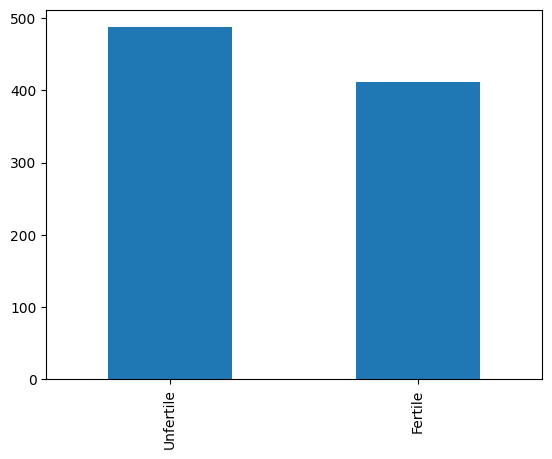

In [ ]:
dados_artigo['Fertility'].value_counts().plot(kind='bar')

Ao visualizar o gráfico, observamos que as classes estão adequadamente distribuídas. Dessa forma, não há necessidade de aplicar técnicas de balanceamento para treinar o modelo.

##BINARIZANDO

No processamento e análise de dados, muitas vezes é útil converter dados categóricos em formatos numéricos. Essa linha de código está criando uma nova coluna 'Fertility_binary' no DataFrame "dados_artigo", onde cada item será 1 se o correspondente item na coluna 'Fertility' for 'Fertile' e 0 caso contrário.

In [ ]:
dados_artigo['Fertility_binary'] = dados_artigo['Fertility'].apply(lambda x: 1 if x == 'Fertile' else 0)

<ipython-input-15-c4bc5c803087>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_artigo['Fertility_binary'] = dados_artigo['Fertility'].apply(lambda x: 1 if x == 'Fertile' else 0)


##**HISTOGRAMA DOS DADOS**

### O que é um Histograma?

Um histograma é uma representação gráfica que permite visualizar a distribuição de um conjunto de dados. Em um histograma, os dados são divididos em uma série de intervalos (também chamados de "bins") e a frequência de ocorrência de dados nesses intervalos é representada por barras. O eixo x representa as categorias ou intervalos de valores, enquanto o eixo y representa a frequência ou contagem de observações em cada intervalo.

### Importância na Análise Exploratória de Dados

A análise exploratória de dados (EDA, do inglês "Exploratory Data Analysis") é uma etapa crucial em qualquer projeto de Ciência de Dados ou Machine Learning, e os histogramas são ferramentas importantes nesse processo. Abaixo estão alguns motivos pelos quais os histogramas são valiosos:

1. **Entendimento da Distribuição**: Histogramas ajudam a entender a forma da distribuição dos dados, como se os dados estão normalmente distribuídos, inclinados para a esquerda ou para a direita, ou se têm várias modas (picos).

2. **Identificação de Outliers**: Ao examinar o histograma, é possível identificar rapidamente se existem outliers (valores extremos) que podem afetar a análise posterior.

3. **Insights Sobre o Centro e a Variação**: O gráfico fornece informações sobre a média, mediana e variância dos dados, que são métricas essenciais na estatística descritiva.

4. **Divisão de Classes**: Em problemas de classificação, histogramas podem ajudar a visualizar a separação entre diferentes classes, fornecendo insights iniciais sobre a dificuldade do problema de classificação.

5. **Facilita a Pré-processamento**: Ao entender a distribuição dos dados, é mais fácil tomar decisões sobre como pré-processar os dados, incluindo a normalização, padronização, etc.

6. **Visual e Fácil de Interpretar**: Histogramas fornecem uma forma visual e intuitiva de explorar os dados, o que pode ser útil não apenas para analistas de dados, mas também para stakeholders que podem não ter um background técnico.

7. **Comparação de Variáveis**: Em um conjunto de dados com várias variáveis, os histogramas podem ajudar a comparar como diferentes variáveis são distribuídas e como elas podem interagir entre si.

Em resumo, histogramas são ferramentas extremamente úteis para fornecer uma visão geral rápida da distribuição e da natureza dos dados, tornando-se uma parte indispensável da análise exploratória de dados.

In [ ]:
# Definindo as colunas que representam os oligoelementos a serem usados para análise.
colunas = ['Ce (ppm)', 'Pr (ppm)', 'Nd (ppm)', 'Sm (ppm)', 'Eu (ppm)', 'Gd (ppm)', 'Tb (ppm)', 'Dy (ppm)', 'Ho (ppm)', 'Er (ppm)', 'Tm (ppm)', 'Yb (ppm)', 'Lu (ppm)', 'Hf (ppm)', 'Th (ppm)', 'U (ppm)']

In [ ]:
# Outra forma de definir as colunas que representam os oligoelementos a serem usados para análise.
colunas = dados_artigo.drop(columns = ['Fertility', 'Fertility_binary']).columns.to_list()

In [ ]:
colunas

['Ce (ppm)',
 'Pr (ppm)',
 'Nd (ppm)',
 'Sm (ppm)',
 'Eu (ppm)',
 'Gd (ppm)',
 'Tb (ppm)',
 'Dy (ppm)',
 'Ho (ppm)',
 'Er (ppm)',
 'Tm (ppm)',
 'Yb (ppm)',
 'Lu (ppm)',
 'Hf (ppm)',
 'Th (ppm)',
 'U (ppm)']

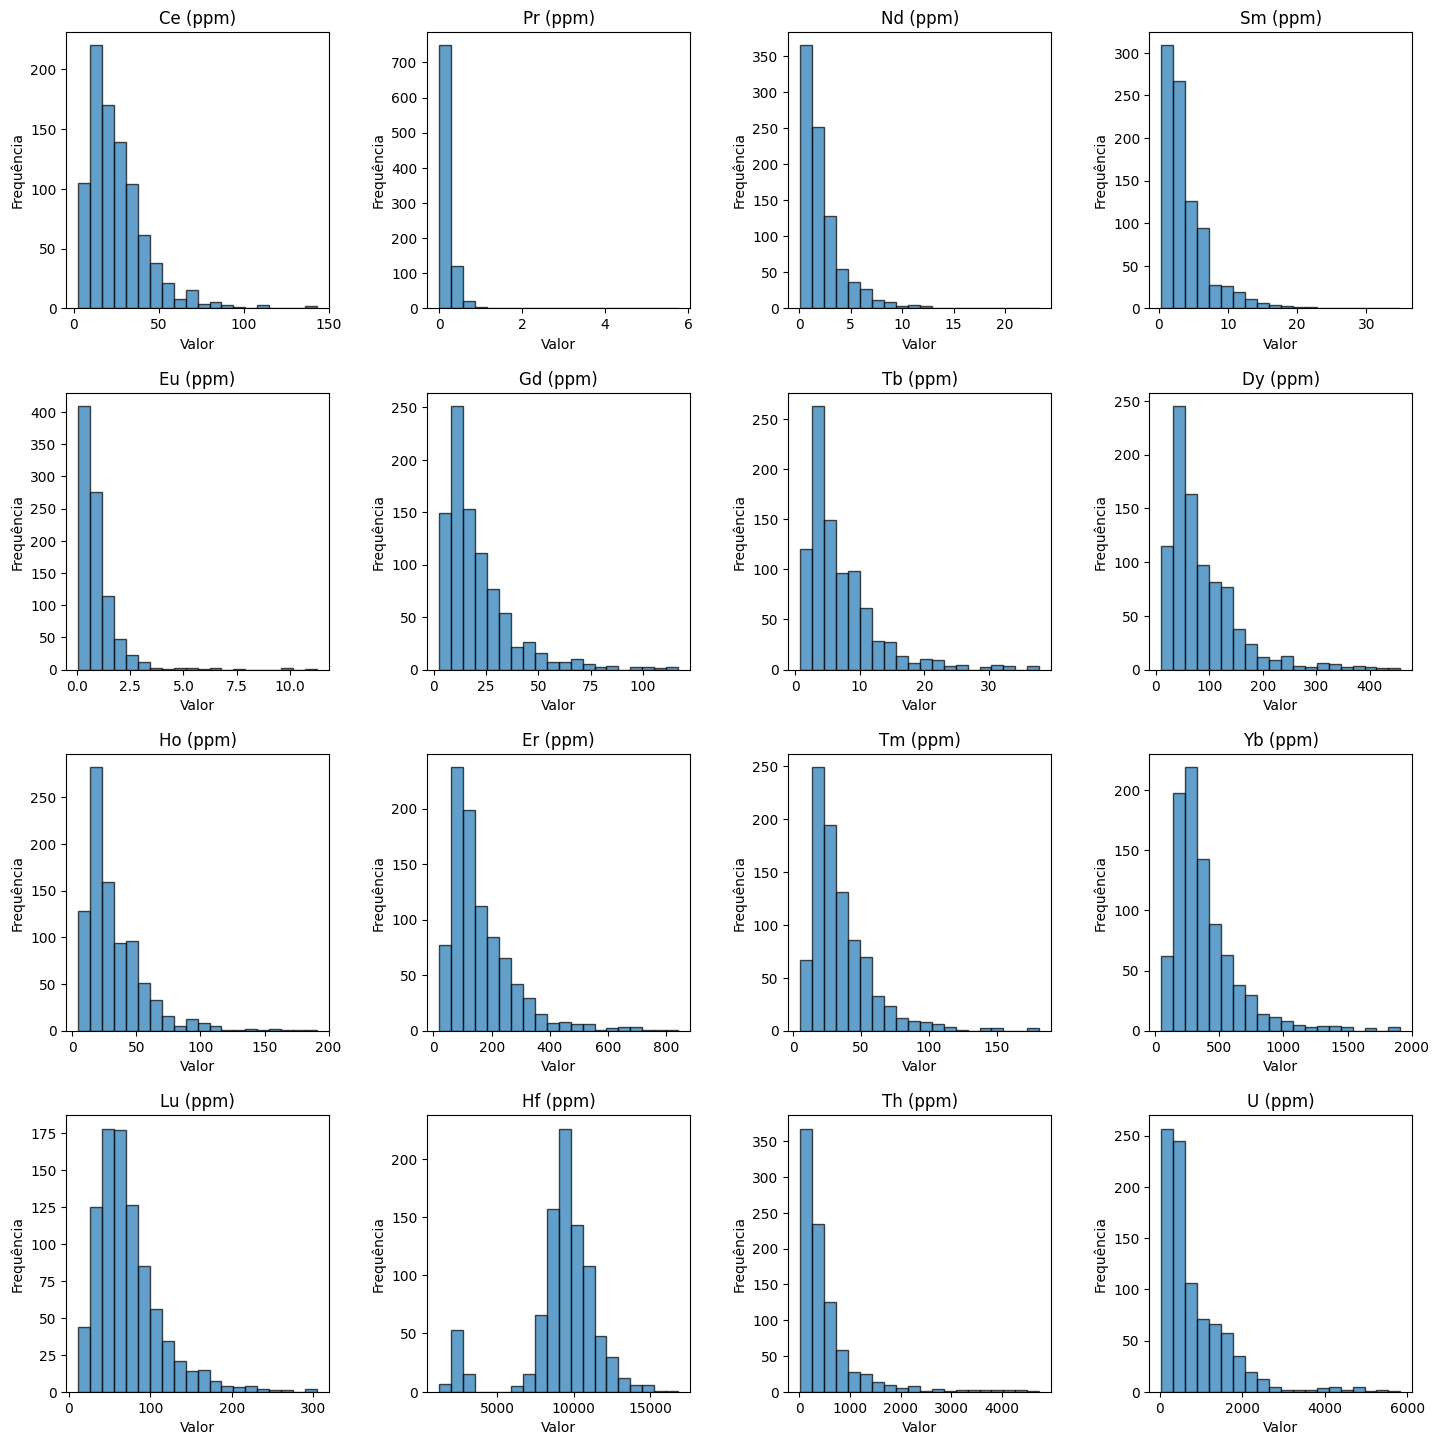

In [ ]:
# Configurando o número de colunas e linhas para os subplots.
# O número de colunas é fixo em 4, e o número de linhas é calculado com base no número total de colunas.
n_cols = 4
n_rows = int(len(colunas) / n_cols) + (len(colunas) % n_cols > 0)

# Criando uma figura e um conjunto de subgráficos (subplots).
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 15))

# Ajustando o espaço entre os subgráficos para evitar sobreposição.
plt.tight_layout(pad=4)

# Loop para criar histogramas para cada coluna (oligoelemento).
for i, nome_coluna in enumerate(colunas):
    row = i // n_cols  # Determinando a linha do subplot
    col_idx = i % n_cols  # Determinando a coluna do subplot
    # Plotando o histograma para a coluna atual
    axs[row, col_idx].hist(dados_artigo[nome_coluna], bins=20, edgecolor='black', alpha=0.7)
    axs[row, col_idx].set_title(nome_coluna)  # Definindo o título do subplot
    axs[row, col_idx].set_ylabel('Frequência')  # Definindo o rótulo do eixo Y
    axs[row, col_idx].set_xlabel('Valor')  # Definindo o rótulo do eixo X

# Se o número total de colunas não for um múltiplo do número de colunas do subplot, remove os eixos extras.
if len(colunas) % n_cols != 0:
    for j in range(len(colunas) % n_cols, n_cols):
        fig.delaxes(axs[n_rows - 1, j])  # Removendo os eixos extras

# Mostrando a figura completa com todos os subplots
plt.show()

## Normalizando os dados

O artigo utiliza a transformação log10 para normalizar os dados. Esta abordagem é crucial uma vez que diversos algoritmos de Machine Learning necessitam que os dados de entrada estejam distribuídos de forma aproximadamente normal (Gaussiana) para que tenham um desempenho ótimo.


###**O que é a Transformação Log10?**

A transformação log10 é uma técnica matemática utilizada para condensar variações amplas em uma escala menor e mais manejável.

###**Por que Normalizar?**

**Distribuição Gaussiana**: O log10 auxilia na transformação dos dados em uma distribuição que se aproxima da normalidade. Isso é benéfico porque muitos algoritmos de Machine Learning, em particular métodos estatísticos como regressões e máquinas de vetores de suporte, operam sob a suposição de que os dados seguem uma distribuição normal.

**Diminuição de Viéses**: Dados que apresentam distribuições enviesadas podem prejudicar o desempenho de algoritmos de Machine Learning. A transformação log10 atenua esse enviesamento, proporcionando uma representação mais simétrica dos dados.

**Melhor Desempenho**: Dados que foram normalizados através da transformação log10 frequentemente facilitam o treinamento do modelo. Eles tendem a tornar o algoritmo mais eficaz, ajudando-o a convergir mais rapidamente para uma solução ideal e proporcionando previsões mais precisas.


In [ ]:
dados_normalizados = np.log10(dados_artigo.drop(columns = ["Fertility", "Fertility_binary"]))

In [ ]:
dados_normalizados['Fertility_binary'] = dados_artigo['Fertility_binary']

Nota: O "+1" é adicionado antes de tomar o logaritmo para evitar problemas matemáticos ao tomar o logaritmo de zero.

Após a transformação, é uma boa prática visualizar novamente os histogramas dos dados para confirmar que eles agora seguem uma distribuição mais normalizada.

In [ ]:
dados_normalizados

,Ce (ppm),Pr (ppm),Nd (ppm),Sm (ppm),Eu (ppm),Gd (ppm),Tb (ppm),Dy (ppm),Ho (ppm),Er (ppm),Tm (ppm),Yb (ppm),Lu (ppm),Hf (ppm),Th (ppm),U (ppm),Fertility_binary
0,1.508987,-1.315552,0.059761,0.296218,-0.012601,1.010953,0.503277,1.570035,1.169978,1.856766,1.228083,2.271729,1.630982,4.008802,2.872774,3.187585,1
1,1.697787,-0.852940,0.270987,0.546515,0.187356,1.256908,0.758078,1.820437,1.396142,2.058688,1.402582,2.397721,1.719203,3.947861,2.471029,2.728021,1
2,1.421254,-1.495606,-0.175314,0.272503,-0.073229,0.992445,0.489524,1.581400,1.192409,1.896733,1.279214,2.313117,1.691118,4.004117,2.769109,3.217691,1
3,1.462200,-1.078168,-0.062472,0.262111,-0.021526,1.035891,0.514738,1.593466,1.196192,1.894547,1.281749,2.317270,1.686056,4.012563,2.779410,3.214141,1
4,1.366791,-1.270622,-0.280493,0.158668,-0.241085,0.881237,0.377779,1.465147,1.096122,1.806744,1.208580,2.263203,1.651917,4.019594,2.660558,3.176154,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,1.438806,-1.080492,0.205854,0.552460,-0.784947,1.354690,0.960387,2.039778,1.647997,2.296994,1.618045,2.568209,1.898397,4.086388,2.228055,2.493666,0
895,1.197746,-1.321216,0.029762,0.392801,-0.937491,1.267973,0.927300,2.006377,1.631454,2.261103,1.605616,2.521145,1.869482,4.098339,1.945093,2.358751,0
896,1.434023,-1.069164,0.122102,0.483482,-0.650152,1.331856,0.951410,2.047502,1.640261,2.290097,1.648413,2.547429,1.873877,4.093121,2.245000,2.508036,0
897,1.491503,-0.419540,0.293493,0.539206,-0.735767,1.241729,0.880104,1.953644,1.572028,2.208110,1.529665,2.468463,1.819585,4.094788,2.099700,2.395658,0


##**HISTOGRAMA DOS DADOS NORMALIZADOS**

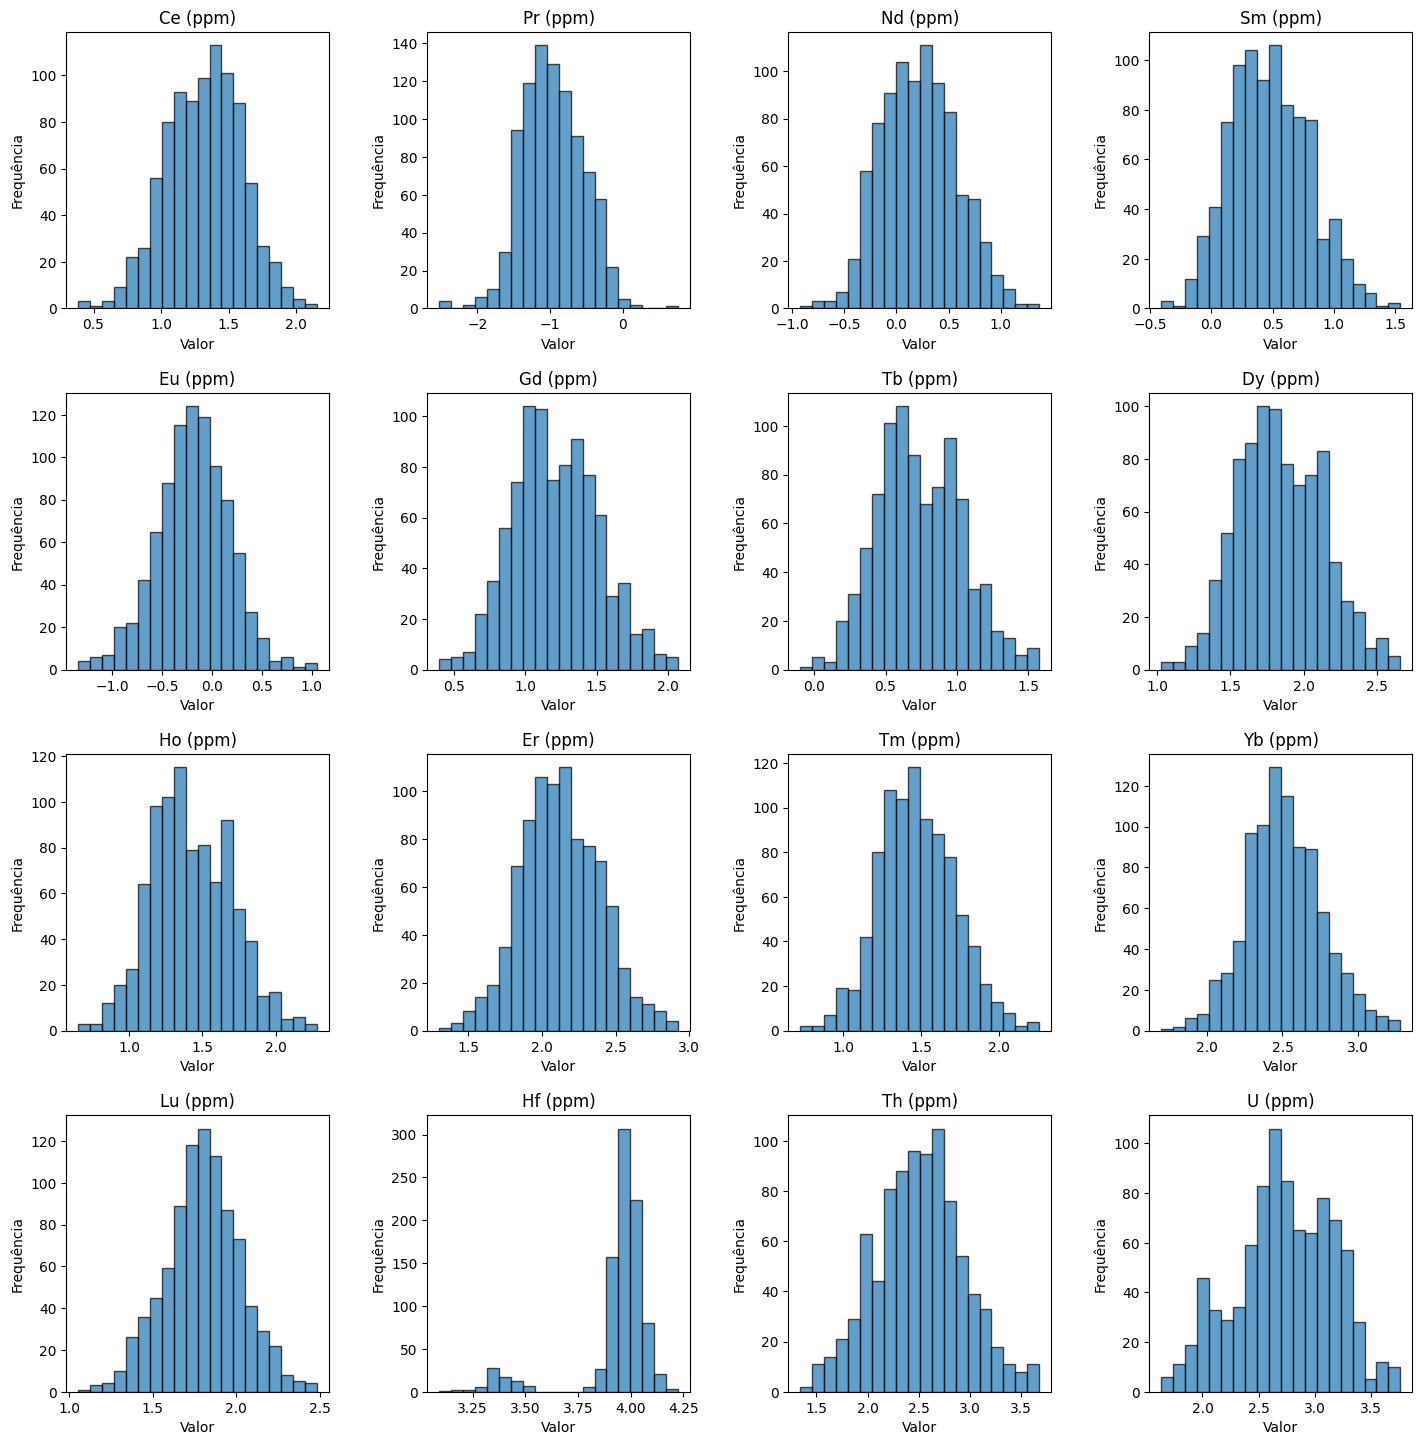

In [ ]:
# Configurando o número de colunas e linhas para os subplots.
# O número de colunas é fixo em 4, e o número de linhas é calculado com base no número total de colunas.
n_cols = 4
n_rows = int(len(colunas) / n_cols) + (len(colunas) % n_cols > 0)

# Criando uma figura e um conjunto de subgráficos (subplots).
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 15))

# Ajustando o espaço entre os subgráficos para evitar sobreposição.
plt.tight_layout(pad=4)

# Loop para criar histogramas para cada coluna (oligoelemento).
for i, nome_coluna in enumerate(colunas):
    row = i // n_cols  # Determinando a linha do subplot
    col_idx = i % n_cols  # Determinando a coluna do subplot
    # Plotando o histograma para a coluna atual
    axs[row, col_idx].hist(dados_normalizados[nome_coluna], bins=20, edgecolor='black', alpha=0.7)
    axs[row, col_idx].set_title(nome_coluna)  # Definindo o título do subplot
    axs[row, col_idx].set_ylabel('Frequência')  # Definindo o rótulo do eixo Y
    axs[row, col_idx].set_xlabel('Valor')  # Definindo o rótulo do eixo X

# Se o número total de colunas não for um múltiplo do número de colunas do subplot, remove os eixos extras.
if len(colunas) % n_cols != 0:
    for j in range(len(colunas) % n_cols, n_cols):
        fig.delaxes(axs[n_rows - 1, j])  # Removendo os eixos extras

# Mostrando a figura completa com todos os subplots
plt.show()

#MACHINE LEARNING

## SVM

### O QUE É SVM?

O SVM é um algoritmo que busca uma linha de separação entre duas classes distintas analisando os dois pontos, um de cada grupo, mais próximos da outra classe. Isto é, o SVM escolhe a reta — também chamada de hiperplano em maiores dimensões— entre dois grupos que se distancia mais de cada um (no caso abaixo, a reta vermelha).
Fonte: [Modelos de Predição | SVM](https://medium.com/turing-talks/turing-talks-12-classifica%C3%A7%C3%A3o-por-svm-f4598094a3f1)

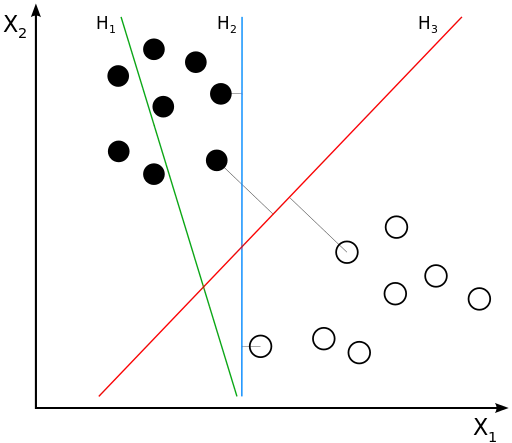

Após descoberta essa reta, o programa conseguirá predizer a qual classe pertence um novo dado ao checar de qual lado da reta ele está.

### **PREPARANDO OS DADOS PARA TREINAR OS MODELOS**

 Em qualquer tarefa de aprendizado supervisionado, temos duas partes principais em nossos dados: as características (ou features) e a variável-alvo (ou label).


1-  **DEFININDO A VARIÁVEL ALVO**:

   y = dados_normalizados['Fertility']

   Aqui, estamos selecionando a coluna 'Fertility' dos nossos dados normalizados e atribuindo-a à variável `y`. Isso significa que estamos tratando 'Fertility' como nossa variável de saída ou variável-alvo. Em outras palavras, nosso objetivo é usar as características restantes para prever os valores desta coluna.

2- **DEFININDO AS CARACTERÍSTICAS**:

   X = dados_normalizados.drop(columns = 'Fertility')

   Neste comando, estamos removendo a coluna 'Fertility' dos dados normalizados e atribuindo o restante à variável `X`. Isso implica que todas as outras colunas, exceto 'Fertility', serão tratadas como nossas características (ou features) sobre as quais o modelo será treinado. Utilizamos o método `.drop()` para excluir a coluna desejada, especificando seu nome e informando que é uma coluna (`columns = 'Fertility'`).
   

Em resumo, `y` contém o que queremos prever, e `X` contém os dados com base nos quais faremos a previsão. Esse é um passo padrão na preparação de dados para muitos modelos de aprendizado de máquina, onde separamos nosso conjunto de dados em características e variável-alvo.


In [ ]:
y = dados_normalizados['Fertility_binary']
X = dados_normalizados.drop(columns = ['Fertility_binary'])

**3 -DIVIDINDO EM TREINO E TESTE**

Neste passo, dividiremos o conjunto de dados em dois grupos: um conjunto de treinamento e um conjunto de teste. Isso é comumente feito no aprendizado de máquina para avaliar a performance de um modelo de forma justa. Treinamos o modelo no conjunto de treinamento e o testamos no conjunto de teste para ver quão bem ele generaliza para dados que não viu anteriormente.

Ao final deste passo, teremos quatro subconjuntos de dados:
- Dois para treinar seu modelo (as características e a variável-alvo).
- Dois para testar a performance do seu modelo (as características e a variável-alvo).



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

###**GRID SEARCH PARA SVM**

O objetivo da busca em grid é encontrar a melhor combinação de hiperparâmetros para um modelo. No caso do SVM, os hiperparâmetros mais comuns que precisamos ajustar são `C`, `gamma` e `kernel`.

**1- DEFININDO A GRADE DE HIPERPARÂMETROS:**

- `C`: É o parâmetro de regularização. Valores baixos permitem que o modelo cometa alguns erros no conjunto de treinamento para obter uma maior generalização, enquanto valores altos tornam o modelo mais rigoroso, tentando classificar todos os pontos de treinamento corretamente, o que pode levar a overfitting.

- `gamma`: Especificamente para o kernel `rbf`, determina a forma da fronteira de decisão. Um valor baixo de `gamma` produzirá uma fronteira mais flexível, enquanto um valor alto criará uma fronteira mais rígida, que pode se adaptar demais aos dados.

- `kernel`: Define o tipo de função usada para separar os dados. `linear` traçará uma linha reta (ou um plano em dimensões mais altas) para separar os dados, enquanto `rbf` (Radial basis function) pode criar fronteiras mais complexas.

**2- APLICANDO A BUSCA EM GRID:**

- `GridSearchCV`: É uma ferramenta que realiza uma busca exaustiva sobre as combinações de parâmetros fornecidas.

- `SVC()`: Este é o modelo SVM que estamos tentando otimizar.

- `refit=True`: Uma vez que a melhor combinação de hiperparâmetros é encontrada, o modelo é treinado novamente usando essa combinação para o conjunto completo de dados fornecidos.

- `verbose=2`: Define o nível de detalhes que queremos ver durante a execução da busca em grid. Valores mais altos mostrarão mais detalhes sobre o progresso do treinamento.

---

Após executar o `grid.fit()`, o modelo SVM será treinado várias vezes, uma para cada combinação de `C`, `gamma` e `kernel` no `param_grid`. Ao final, o modelo com a melhor performance no conjunto de treinamento será selecionado e pronto para fazer previsões.

In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, 

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

In [ ]:
print("Melhores hiperparâmetros encontrados: ", grid.best_params_)

Melhores hiperparâmetros encontrados:  {'C': 10, 'gamma': 1, 'kernel': 'linear'}


###**TREINANDO O MODELO**

In [ ]:
# Treinando o SVM
modelo_svm = SVC(C = 10, gamma =1, kernel='linear')
modelo_svm.fit(X_train, y_train)

# Fazendo previsões
y_pred_svm = modelo_svm.predict(X_test)

### **AVALIANDO O MODELO**

####**VALIDAÇÃO CRUZADA**

#####**O QUE É A VALIDAÇÃO CRUZADA?**

A validação cruzada é uma técnica de avaliação de modelo que busca entender como o modelo treinado irá generalizar para um conjunto de dados independente. Ela envolve dividir o conjunto de treinamento em subconjuntos menores chamados "folds". O modelo é treinado em alguns desses folds e testado nos restantes. Este processo é repetido várias vezes, com diferentes folds servindo como conjunto de teste a cada vez.

In [ ]:
# O parâmetro 'cv' determina o número de folds. Por exemplo, cv=10 indica uma validação cruzada com 10 folds.
scores = cross_val_score(modelo_svm, X_train, y_train, cv=10)

In [ ]:
print("Scores para cada fold:", scores)
print("Média dos scores:", scores.mean())
print("Desvio padrão dos scores:", scores.std())

Scores para cada fold: [0.93650794 0.92063492 0.96825397 0.95238095 0.95238095 0.96825397
 0.96825397 0.9047619  0.92063492 0.93548387]
Média dos scores: 0.9427547363031235
Desvio padrão dos scores: 0.02156357180876912


##### **RESULTADOS DA VALIDAÇÃO CRUZADA**

- **Scores para cada fold**:  
    Os scores em cada fold do conjunto de treinamento são:  
    ```
    [0.93650794 0.92063492 0.96825397 0.95238095 0.95238095 0.96825397
    0.96825397 0.9047619  0.92063492 0.93548387]
    ```  
    Isso mostra que o modelo tem um desempenho variando entre 0.9032 e 0.9683 em diferentes subconjuntos do conjunto de treinamento. Esta variação é um bom sinal, indicando que o modelo é robusto e tem um desempenho consistentemente alto em diferentes segmentos dos dados.

- **Média dos scores**:  
    A média dos scores é 0.9427, indicando um alto desempenho geral do modelo no conjunto de treinamento.

- **Desvio padrão dos scores**:  
    O desvio padrão dos scores é 0.02156. Este é um valor relativamente baixo, mostrando que os scores nos diferentes folds não variam muito em relação à média.

---



####**ACURÁCIA**

A acurácia é uma métrica de avaliação amplamente usada em problemas de classificação para medir a proporção total de previsões corretas em relação ao total de previsões feitas. É uma medida geral da capacidade de um modelo de fazer previsões corretas, independentemente da classe.

Formalmente, a acurácia é definida como:

$$\text{Acurácia} = \frac{\text{Número de previsões corretas}}{\text{Número total de previsões}} $$

Em termos de classificação binária, onde temos uma classe positiva e uma classe negativa, a acurácia pode ser expressa em termos de verdadeiros positivos (VP), verdadeiros negativos (VN), falsos positivos (FP) e falsos negativos (FN):

$$\text{Acurácia} = \frac{VP + VN}{VP + VN + FP + FN} $$

Vale ressaltar alguns pontos sobre a acurácia:

1. **Acurácia vs. Classes Desequilibradas**: Em situações onde as classes são desequilibradas (por exemplo, 95% das amostras pertencem à classe 1 e apenas 5% à classe 2), a acurácia pode ser enganosa. Se um modelo simplesmente prevê sempre a classe 1, ele teria uma acurácia de 95%, embora não tenha realmente "aprendido" nada útil.

2. **Outras Métricas**: Em muitas situações, outras métricas, como precisão, recall e F1 score, podem ser mais informativas do que a acurácia, especialmente quando as classes estão desequilibradas ou quando os custos associados a diferentes tipos de erros (FP vs. FN) são diferentes.

3. **Interpretação**: Uma acurácia de 1.0 (ou 100%) indica que todas as previsões estão corretas, enquanto uma acurácia de 0.0 (ou 0%) indica que todas as previsões estão erradas.


In [ ]:
print("Acurácia:", accuracy_score(y_test, y_pred_svm))

Acurácia: 0.9555555555555556


O modelo teve uma acurácia de aproximadamente 95.93% no conjunto de testes. Isso significa que, de todas as previsões que o modelo fez no conjunto de testes, cerca de 95.93% estavam corretas.

####**CURVA ROC**

A curva ROC (Receiver Operating Characteristic) é uma ferramenta gráfica utilizada para avaliar o desempenho de modelos de classificação. Ela traça a taxa de verdadeiros positivos (sensibilidade) em função da taxa de falsos positivos (1 - especificidade) para diferentes pontos de corte do classificador.

Aqui estão alguns pontos-chave sobre a curva ROC:

1. **Taxa de Verdadeiros Positivos (Sensibilidade)**: Esta é a proporção de positivos reais que foram corretamente identificados pelo modelo.
   
    $$\text{TVP}  = \frac{\text{Verdadeiros Positivos}}{\text{Verdadeiros Positivos} + \text{Falsos Negativos}} \$$

2. **Taxa de Falsos Positivos (1 - Especificidade)**: Esta é a proporção de negativos reais que foram incorretamente identificados como positivos pelo modelo.
   
   $$\text{TFP} = \frac{\text{Falsos Positivos}}{\text{Falsos Positivos} + \text{Verdadeiros Negativos}}$$

3. **Linha Diagonal**: Uma linha diagonal do canto inferior esquerdo ao canto superior direito representa o desempenho de um classificador aleatório (sem habilidade). Idealmente, queremos que a curva ROC esteja o mais distante possível dessa linha diagonal, em direção ao canto superior esquerdo.

4. **Área sob a curva (AUC - Area Under the Curve)**: Uma métrica relacionada é a AUC, que representa a área sob a curva ROC. Um valor de AUC de 0,5 indica que o modelo não tem capacidade de discriminação (equivalente a uma escolha aleatória), enquanto um valor de 1,0 indica que o modelo tem uma discriminação perfeita.

5. **Interpretação**: Um modelo cuja curva ROC está mais próxima do canto superior esquerdo (ou seja, uma maior área sob a curva) é considerado melhor do que um modelo cuja curva ROC se aproxima da linha diagonal.


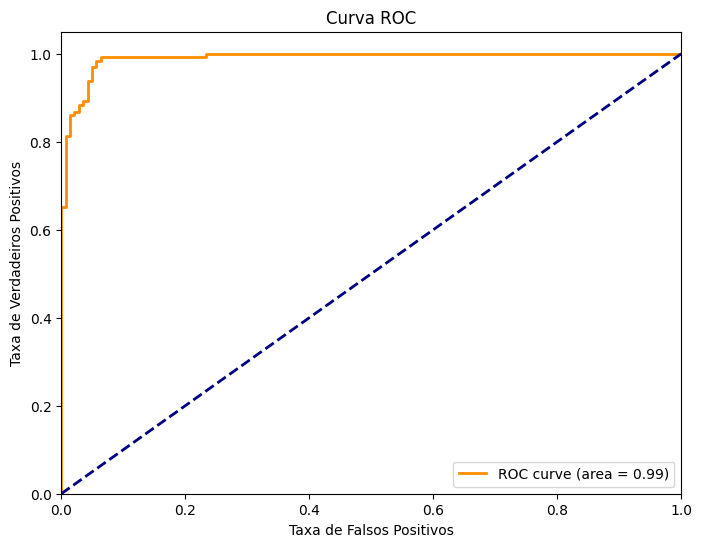

In [ ]:
# Calcula as probabilidades de pertencer à classe positiva (classe 1) usando o método decision_function do modelo SVM.
# Esse método retorna a distância de cada amostra para o hiperplano de decisão.
y_prob_svm = modelo_svm.decision_function(X_test)

# Utiliza a função roc_curve para calcular a Taxa de Falsos Positivos (fpr) e a Taxa de Verdadeiros Positivos (tpr)
# com base nas verdadeiras etiquetas y_test e nas probabilidades calculadas y_prob_svm.
fpr, tpr, thresholds = roc_curve(y_test, y_prob_svm)

# Calcula a área sob a curva ROC (AUC) usando as taxas de falso e verdadeiro positivos.
roc_auc = auc(fpr, tpr)

# Inicializa uma nova figura para o plot com dimensão de 8x6 polegadas.
plt.figure(figsize=(8, 6))

# Plota a curva ROC. A linha representa as taxas de verdadeiro e falso positivo em diferentes limiares.
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))

# Plota a linha diagonal que representa um classificador aleatório.
# Se o modelo é bom, a curva ROC estará acima dessa linha.
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Define os limites do eixo x (de 0 a 1) e y (de 0 a 1.05) para o plot.
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Define os rótulos dos eixos x e y.
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')

# Define o título do plot.
plt.title('Curva ROC')

# Adiciona a legenda no canto inferior direito.
plt.legend(loc='lower right')

# Exibe o plot.
plt.show()


 Um valor de AUC de 0,99 significa que o modelo é capaz de diferenciar entre as classes positiva e negativa com uma alta precisão.

####**F1-SCORE**

O F1 score é uma métrica utilizada para avaliar a precisão de modelos de classificação, especialmente em situações em que as classes são desequilibradas. É uma medida que combina precisão e recall em uma única métrica.

Para entender o F1 score, primeiro é preciso compreender o que são precisão e recall:

1. **Precisão (Precision)**: É a proporção de identificações positivas feitas corretamente em relação ao total de identificações positivas (ou seja, a proporção de verdadeiros positivos em relação à soma de verdadeiros positivos e falsos positivos). Em outras palavras, dos itens classificados como positivos, quantos realmente são positivos?

   $$ \text{Precisão} = \frac{\text{Verdadeiros Positivos}}{\text{Verdadeiros Positivos} + \text{Falsos Positivos}} $$

2. **Recall (Sensibilidade ou Taxa de Verdadeiros Positivos)**: É a proporção de positivos reais que foram identificados corretamente em relação ao total de positivos reais (ou seja, a proporção de verdadeiros positivos em relação à soma de verdadeiros positivos e falsos negativos). Em outras palavras, dos itens que realmente são positivos, quantos foram classificados como positivos?

   $$ \text{Recall} = \frac{\text{Verdadeiros Positivos}}{\text{Verdadeiros Positivos} + \text{Falsos Negativos}} $$

O F1 score é a média harmônica entre precisão e recall:

$$ \text{F1 score} = 2 \times \frac{\text{Precisão} \times \text{Recall}}{\text{Precisão} + \text{Recall}} $$

O valor do F1 score varia entre 0 e 1. Um F1 score perfeito (onde precisão e recall são 1) é igual a 1, enquanto um F1 score pior (onde precisão ou recall é 0) é igual a 0.


In [ ]:
f1_svm = f1_score(y_test, y_pred_svm, average='macro')
print(f"F1 Score: {f1_svm:.4f}")

F1 Score: 0.9555


 F1 Score de 0,96 é também muito alto, indicando que tanto a precisão (a proporção de identificações positivas que foram efetivamente corretas) quanto o recall (a proporção de positivos reais que foram identificados corretamente) do modelo são elevados.

Em resumo, o modelo mostra uma performance notável em todas as três métricas. Estas métricas, combinadas, fornecem uma representação sólida da capacidade do modelo em fazer previsões corretas, distinguir entre classes e equilibrar precisão e recall.

In [ ]:
from sklearn.tree import DecisionTreeClassifier,  plot_tree


In [ ]:
arvore = DecisionTreeClassifier()
arvore.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
score = arvore.score(X_test, y_test)
print(f"Acurácia: {score}")

Acurácia: 0.8703703703703703


##**RANDOM FOREST**

### **EXPLICANDO O MÉTODO**

O **Random Forest** é um método de aprendizado de máquina que pertence à categoria dos ensembles. Ele combina várias árvores de decisão para produzir uma previsão mais robusta e precisa. Vamos entender seu funcionamento passo a passo:

## 1. Bootstrap

Para cada árvore a ser construída dentro da floresta:

- É realizada uma amostragem **com reposição** do conjunto de treinamento.
- Isso resulta em diferentes subconjuntos de dados, onde alguns pontos podem ser repetidos e outros podem não estar presentes.

## 2. Construção da Árvore

Cada árvore é construída da seguinte forma:

- Em cada divisão (nó) da árvore, um subconjunto **aleatório** das características é selecionado.
- A divisão é feita usando a característica desse subconjunto que proporciona a melhor separação (por exemplo, ganho de informação).
- O processo é repetido até que se atinja um número predefinido de pontos em um nó ou a árvore alcance uma profundidade máxima.

## 3. Agregação

Ao classificar uma nova observação:

- A observação é passada por **todas** as árvores na floresta.
- Cada árvore fornece sua própria previsão de classe.
- A previsão final do Random Forest é a classe que recebe a **maioria dos votos** entre todas as árvores.

## Vantagens do Random Forest

- **Robustez e Precisão**: Combina várias árvores, o que geralmente resulta em um modelo mais robusto e preciso do que uma única árvore de decisão.
- **Evita Overfitting**: Ao usar múltiplas árvores e subamostragem, o Random Forest tende a ser menos propenso a overfitting do que uma única árvore de decisão.
- **Importância das Características**: Pode fornecer uma avaliação da importância de cada característica na previsão.

---



###**TREINANDO O MODELO**

In [ ]:
# Instanciando e treinando o Random Forest
modelo_rf = RandomForestClassifier(n_estimators=150, min_samples_split=18, min_samples_leaf=1, max_depth=12, bootstrap=False)
modelo_rf.fit(X_train, y_train)

# Fazendo previsões
y_pred_rf = modelo_rf.predict(X_test)

###**AVALIANDO O MODELO**

In [ ]:
scores_rf = cross_val_score(modelo_rf, X_train, y_train, cv=10)
print("Scores para cada fold:", scores_rf)
print("Média dos scores:", scores_rf.mean())
print("Desvio padrão dos scores:", scores_rf.std())

Scores para cada fold: [0.92063492 0.85714286 0.98412698 0.92063492 0.93650794 0.9047619
 0.9047619  0.93650794 0.88888889 0.88709677]
Média dos scores: 0.9141065028161803
Desvio padrão dos scores: 0.0328279000101484


####**ACURÁCIA**


In [ ]:
acuracia_rf = accuracy_score(y_test, y_pred_rf)
print(f"Acurácia do Random Forest: {acuracia_rf:.4f}")

Acurácia do Random Forest: 0.9407


###**FEATURE IMPORTANCE**

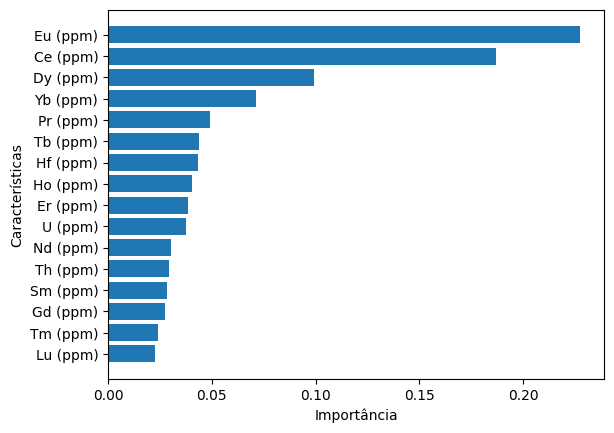

In [ ]:
importances = modelo_rf.feature_importances_

# Obter índices ordenados
sorted_indices = np.argsort(importances)

# Ordenar os valores e colunas
sorted_importances = importances[sorted_indices]
sorted_columns = X_test.columns[sorted_indices]

# Plotar
plt.barh(sorted_columns, sorted_importances)
plt.xlabel('Importância')
plt.ylabel('Características')
plt.show()

As características mais importantes usadas para identificar a fertilidade do zircão foram **Eu**, **Ce** e **Dy**. A modelagem da importância das características da química do zircão é particularmente desafiadora porque os REEs (Elementos da Terra Rara) são colineares.

No entanto, esses elementos com alta importância de característica sempre foram usados para distinguir zircões férteis de zircões não férteis em esquemas de classificação bivariada tradicionais, como **Eu/Eu***, **Ce/Ce*** e **Dy/Yb** (Zhou et al., 2022).

**Referência**:
- Zhou, Y., Zhang, Z., Yang, J., Ge, Y., & Cheng, Q. (2022). Machine Learning and Singularity Analysis Reveal Zircon Fertility and Magmatic Intensity: Implications for Porphyry Copper Potential. *Natural Resources Research, 31*. [https://doi.org/10.1007/s11053-022-10122-y](https://doi.org/10.1007/s11053-022-10122-y)


#**ESTUDO DE CASO**

##**LENDO O ARQUIVO**

In [ ]:
dados_teste = pd.read_excel('/content/drive/MyDrive/minicurso_geosudeste/Table S2.xlsx', header = 2)

##**ANÁLISE EXPLORATÓRIA DOS DADOS**

###**FUNÇÃO INFO**

In [ ]:
dados_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 55 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   No.             1085 non-null   int64  
 1   Area            1085 non-null   object 
 2   Location        1085 non-null   object 
 3   Latitude (°)    1085 non-null   float64
 4   Longitude (°)   1085 non-null   float64
 5   Sample No.      1085 non-null   object 
 6   Spot No.        1085 non-null   object 
 7   Description     1085 non-null   object 
 8   Age (Ma)        1085 non-null   float64
 9   2σ              1085 non-null   float64
 10  Reference       1085 non-null   object 
 11  P (ppm)         1085 non-null   float64
 12  Ti (ppm)        1085 non-null   object 
 13  Fe (ppm)        0 non-null      float64
 14  Zr (ppm)        1085 non-null   float64
 15  Rb (ppm)        0 non-null      float64
 16  Y (ppm)         0 non-null      float64
 17  Nb (ppm)        0 non-null      f

In [ ]:
dados_teste

,No.,Area,Location,Latitude (°),Longitude (°),Sample No.,Spot No.,Description,Age (Ma),2σ,Reference,P (ppm),Ti (ppm),Fe (ppm),Zr (ppm),Rb (ppm),Y (ppm),Nb (ppm),Ba (ppm),La (ppm),Ce (ppm),Pr (ppm),Nd (ppm),Sm (ppm),Eu (ppm),Gd (ppm),Tb (ppm),Dy (ppm),Ho (ppm),Er (ppm),Tm (ppm),Yb (ppm),Lu (ppm),Hf (ppm),Th (ppm),U (ppm),Th/U,logLa (ppm),logCe (ppm),logPr (ppm),logNd (ppm),logSm (ppm),logEu (ppm),logGd (ppm),logTb (ppm),logDy (ppm),logHo (ppm),logEr (ppm),logTm (ppm),logYb (ppm),logLu (ppm),logTh (ppm),logU (ppm),Results of SVM,Results of RF
0,1,China,southern Tibet,91.740000,29.841726,River 1,19-12-11-2,River sand,18.0,2.56,Tang et al. 2020,297.51,3.73,NaN,419729.66,NaN,NaN,NaN,NaN,0.136,25.95,0.199,1.58,2.80,0.886,12.50,4.09,49.28,18.79,94.75,21.40,212.87,47.39,9809.34,257.80,269.59,0.956267,-0.866461,1.414137,-0.701147,0.198657,0.447158,-0.052566,1.096910,0.611723,1.692671,1.273927,1.976579,1.330414,2.328114,1.675687,2.411283,2.430704,Fertile,Fertile
1,2,China,southern Tibet,91.740000,29.841726,River 1,19-12-11-3,River sand,55.4,3.46,Tang et al. 2020,597.88,16.95,NaN,438947.06,NaN,NaN,NaN,NaN,0.134,25.62,0.500,7.00,11.50,1.660,66.81,22.50,283.66,106.48,492.61,96.63,836.18,162.59,9348.50,453.09,312.83,1.448359,-0.872895,1.408579,-0.301030,0.845098,1.060698,0.220108,1.824841,1.352183,2.452798,2.027268,2.692503,1.985112,2.922300,2.211094,2.656184,2.495308,Unfertile,Unfertile
2,3,China,southern Tibet,91.740000,29.841726,River 1,19-12-11-4,River sand,65.5,4.58,Tang et al. 2020,307.15,8.34,NaN,475686.22,NaN,NaN,NaN,NaN,0.140,14.82,0.148,0.95,2.12,0.734,12.95,4.37,62.63,27.82,154.00,37.21,383.69,89.91,10458.37,117.68,209.89,0.560675,-0.853872,1.170848,-0.829738,-0.022276,0.326336,-0.134304,1.112270,0.640481,1.796782,1.444357,2.187521,1.570660,2.583980,1.953808,2.070703,2.321992,Unfertile,Fertile
3,4,China,southern Tibet,91.740000,29.841726,River 1,19-12-11-5,River sand,61.1,4.70,Tang et al. 2020,270.05,5.21,NaN,487786.59,NaN,NaN,NaN,NaN,0.144,11.73,0.142,0.75,1.39,0.598,10.12,3.52,51.78,22.32,129.56,32.12,353.00,85.51,11786.84,143.12,324.76,0.440695,-0.841638,1.069298,-0.847712,-0.124939,0.143015,-0.223299,1.005181,0.546543,1.714162,1.348694,2.112471,1.506776,2.547775,1.932017,2.155700,2.511563,Unfertile,Fertile
4,5,China,southern Tibet,91.740000,29.841726,River 1,19-12-11-8,River sand,17.4,1.54,Tang et al. 2020,171.78,5.15,NaN,382980.41,NaN,NaN,NaN,NaN,0.690,45.92,0.190,1.91,4.01,1.040,13.76,4.34,48.95,18.13,94.90,21.95,228.47,51.87,10403.35,886.21,1049.71,0.844243,-0.161151,1.662002,-0.721246,0.281033,0.603144,0.017033,1.138618,0.637490,1.689753,1.258398,1.977266,1.341435,2.358829,1.714916,2.947537,3.021069,Fertile,Fertile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,1221,China,southern Tibet,93.131944,29.195833,River 4,15JT06 91,River sand,89.0,10.00,Tang et al. 2020,177.05,12.26,NaN,259836.91,NaN,NaN,NaN,NaN,0.085,7.26,0.066,1.24,3.04,0.497,14.35,4.89,61.36,23.56,104.95,24.26,247.12,43.04,9647.91,67.78,92.45,0.733153,-1.070581,0.860937,-1.180456,0.093422,0.482874,-0.303644,1.156852,0.689309,1.787885,1.372175,2.020982,1.384891,2.392908,1.633872,1.831102,1.965907,Unfertile,Unfertile
1081,1222,China,southern Tibet,93.131944,29.195833,River 4,15JT06 92,River sand,47.0,2.00,Tang et al. 2020,155.59,3.88,NaN,259990.72,NaN,NaN,NaN,NaN,0.100,33.76,0.063,1.55,3.35,0.840,13.46,4.39,54.29,21.08,100.54,24.35,261.76,47.71,10443.38,626.89,789.70,0.793833,-1.000000,1.528402,-1.200659,0.190332,0.525045,-0.075721,1.129045,0.642465,1.734720,1.323871,2.002339,1.386499,2.417903,1.678609,2.797191,2.897462,Fertile,Fertile
1082,1223,China,southern Tibet,93.131944,29.195833,River 4,15JT06 93,River sand,88.0,6.00,Tang et al. 2020,193.97,9.28,NaN,253361.84,NaN,NaN,NaN,NaN,0.056,3.57,0.078,0.72,2.24,0.413,12.13,4.23,53.63,20.04,93.37,21.70,221.56,39.32,8689.93,63.60,145.01,0

In [ ]:
dados_teste.describe()

,No.,Latitude (°),Longitude (°),Age (Ma),2σ,P (ppm),Fe (ppm),Zr (ppm),Rb (ppm),Y (ppm),Nb (ppm),Ba (ppm),La (ppm),Ce (ppm),Pr (ppm),Nd (ppm),Sm (ppm),Eu (ppm),Gd (ppm),Tb (ppm),Dy (ppm),Ho (ppm),Er (ppm),Tm (ppm),Yb (ppm),Lu (ppm),Hf (ppm),Th (ppm),U (ppm),Th/U,logLa (ppm),logCe (ppm),logPr (ppm),logNd (ppm),logSm (ppm),logEu (ppm),logGd (ppm),logTb (ppm),logDy (ppm),logHo (ppm),logEr (ppm),logTm (ppm),logYb (ppm),logLu (ppm),logTh (ppm),logU (ppm)
count,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,0.0,1085.000000,0.0,0.0,0.0,0.0,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000
mean,594.474654,91.656430,29.499275,58.327097,5.754544,276.044000,NaN,428628.926949,NaN,NaN,NaN,NaN,0.213885,31.509641,0.233288,2.607539,4.650599,1.195813,23.873447,7.926519,96.721917,37.024802,190.168488,39.322590,390.125502,80.927853,9884.380074,508.676341,550.945493,0.878510,-0.697041,1.355640,-0.688262,0.283642,0.528446,-0.069022,1.272421,0.806886,1.903882,1.496158,2.201270,1.539133,2.541562,1.861176,2.482349,2.581982
std,338.804650,0.700566,0.222226,27.436646,6.373331,121.131328,NaN,73553.161813,NaN,NaN,NaN,NaN,0.082751,35.713030,0.163697,2.824035,4.600170,1.272867,19.610953,5.917052,67.054137,23.864136,148.700255,21.605753,200.705273,39.812089,1348.575694,766.716604,547.450770,0.422592,0.155010,0.339538,0.200632,0.303718,0.333576,0.341275,0.292368,0.276042,0.260912,0.246572,0.245745,0.218491,0.208183,0.204496,0.421154,0.371345
min,1.000000,90.929076,29.195833,5.800000,0.520000,20.610000,NaN,238392.440000,NaN,NaN,NaN,NaN,0.056000,1.080000,0.042000,0.350000,0.370000,0.110000,2.370000,0.733000,8.630000,3.500000,22.790000,4.660000,27.460000,3.660000,5282.220000,15.490000,25.810000,0.100723,-1.251812,0.033424,-1.376751,-0.455932,-0.431798,-0.958607,0.374748,-0.134896,0.936011,0.544068,1.357744,0.668386,1.438701,0.563481,1.190051,1.411788
25%,311.000000,90.929076,29.365879,46.000000,2.560000,194.320000,NaN,436484.470000,NaN,NaN,NaN,NaN,0.174000,12.280000,0.162000,1.160000,1.910000,0.511000,11.550000,4.130000,53.470000,21.410000,110.520000,25.320000,259.710000,55.060000,9047.100000,147.580000,203.870000,0.589437,-0.759451,1.089198,-0.790485,0.064458,0.281033,-0.291579,1.062582,0.615950,1.728110,1.330617,2.043441,1.403464,2.414489,1.740836,2.169028,2.309353
50%,596.000000,91.740000,29.442720,53.900000,4.100000,252.900000,NaN,450289.000000,NaN,NaN,NaN,NaN,0.212000,22.570000,0.192000,1.530000,3.130000,0.815000,17.350000,6.130000,76.160000,30.380000,153.480000,34.160000,346.040000,73.250000,9926.390000,292.310000,386.610000,0.797987,-0.673664,1.353532,-0.716699,0.184691,0.495544,-0.088842,1.239299,0.787460,1.881727,1.482588,2.186052,1.533518,2.539126,1.864808,2.465844,2.587273
75%,877.000000,91.832431,29.841726,68.000000,6.780000,334.670000,NaN,464725.750000,NaN,NaN,NaN,NaN,0.244000,38.860000,0.239000,2.870000,5.630000,1.370000,29.520000,9.650000,116.970000,44.840000,216.630000,46.520000,463.500000,97.630000,10669.590000,574.880000,687.020000,1.044154,-0.612610,1.589503,-0.621602,0.457882,0.750508,0.136721,1.470116,0.984527,2.068074,1.651666,2.335719,1.667640,2.666050,1.989583,2.759577,2.836969
max,1226.000000,93.131944,29.841726,134.700000,96.000000,748.610000,NaN,557271.060000,NaN,NaN,NaN,NaN,0.900000,689.730000,1.640000,25.990000,42.530000,13.450000,158.500000,51.280000,570.890000,202.350000,1822.150000,174.770000,1836.200000,414.190000,16995.230000,11338.610000,4738.780000,4.032403,-0.045757,2.838679,0.214844,1.414806,1.628695,1.128722,2.200029,1.709948,2.756552,2.306103,3.260584,2.242467,3.263920,2.617200,4.054560,3.675667


###**PLOTANDO AS AMOSTRAS NO MAPA MUNDI**

In [ ]:
dados_teste["Latitude (°)"] = dados_teste["Latitude (°)"].astype(float)
dados_teste["Longitude (°)"] = dados_teste["Longitude (°)"].astype(float)

<ipython-input-48-fa0aaefa27db>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


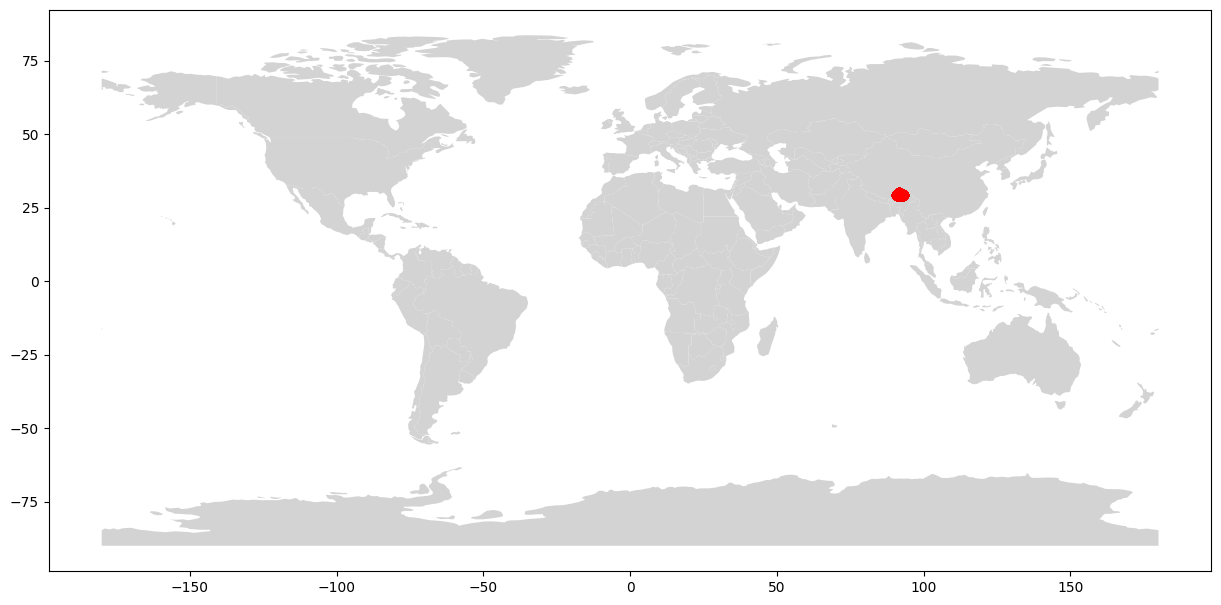

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plotando o mapa
fig, ax = plt.subplots(figsize=(15,10))
world.plot(ax=ax, color='lightgray')
ax.scatter(dados_teste["Latitude (°)"], dados_teste["Longitude (°)"], color='red', s=50)
plt.show()

###**FILTRANDO OS DADOS**

In [ ]:
dados_teste_filtrados = dados_teste[['Ce (ppm)', 'Pr (ppm)', 'Nd (ppm)', 'Sm (ppm)', 'Eu (ppm)', 'Gd (ppm)', 'Tb (ppm)', 'Dy (ppm)', 'Ho (ppm)', 'Er (ppm)', 'Tm (ppm)','Yb (ppm)', 'Lu (ppm)',  'Hf (ppm)', 'Th (ppm)', 'U (ppm)']]

###**HISTOGRAMA DOS DADOS**

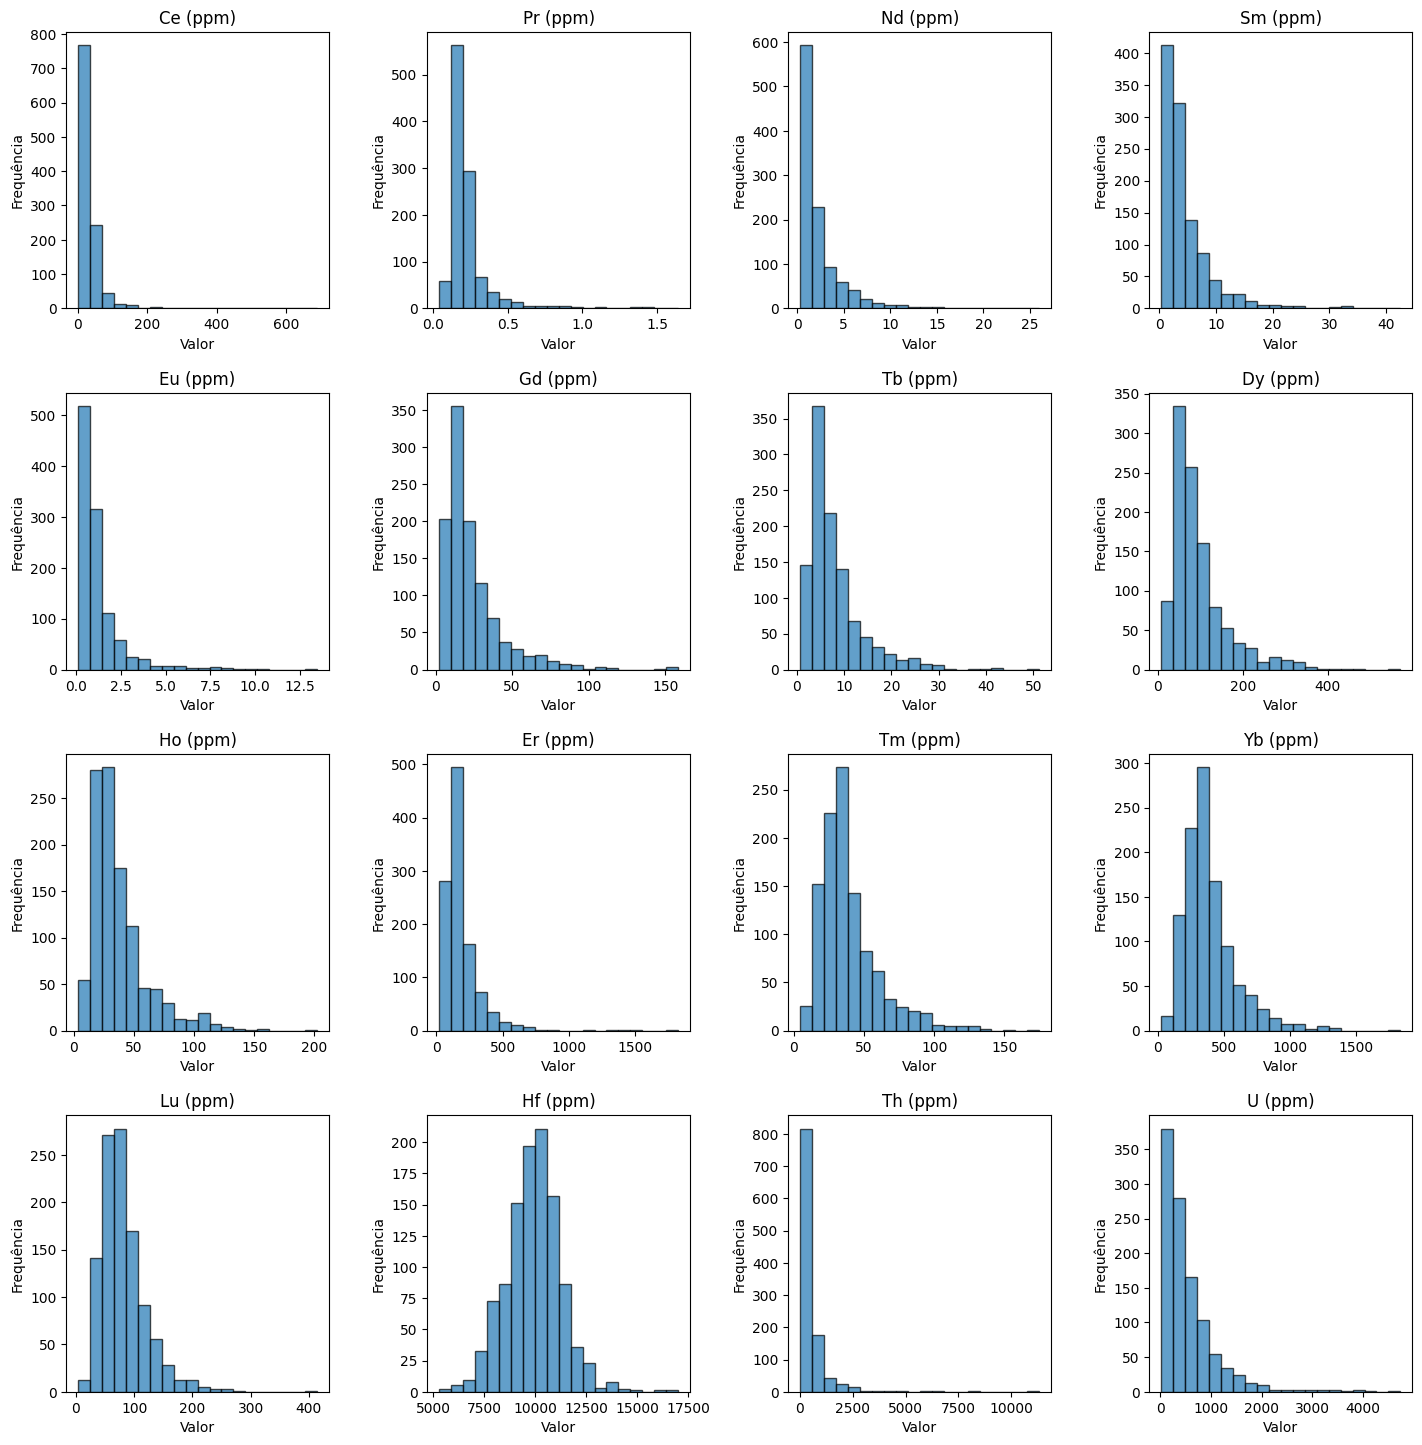

In [ ]:
# Configurando o número de colunas e linhas para os subplots.
# O número de colunas é fixo em 4, e o número de linhas é calculado com base no número total de colunas.
n_cols = 4
n_rows = int(len(colunas) / n_cols) + (len(colunas) % n_cols > 0)

# Criando uma figura e um conjunto de subgráficos (subplots).
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 15))

# Ajustando o espaço entre os subgráficos para evitar sobreposição.
plt.tight_layout(pad=4)

# Loop para criar histogramas para cada coluna (oligoelemento).
for i, nome_coluna in enumerate(colunas):
    row = i // n_cols  # Determinando a linha do subplot
    col_idx = i % n_cols  # Determinando a coluna do subplot
    # Plotando o histograma para a coluna atual
    axs[row, col_idx].hist(dados_teste[nome_coluna], bins=20, edgecolor='black', alpha=0.7)
    axs[row, col_idx].set_title(nome_coluna)  # Definindo o título do subplot
    axs[row, col_idx].set_ylabel('Frequência')  # Definindo o rótulo do eixo Y
    axs[row, col_idx].set_xlabel('Valor')  # Definindo o rótulo do eixo X

# Se o número total de colunas não for um múltiplo do número de colunas do subplot, remove os eixos extras.
if len(colunas) % n_cols != 0:
    for j in range(len(colunas) % n_cols, n_cols):
        fig.delaxes(axs[n_rows - 1, j])  # Removendo os eixos extras

# Mostrando a figura completa com todos os subplots
plt.show()

###**NORMALIZANDO OS DADOS**

In [ ]:
dados_teste_normalizados = np.log10(dados_teste_filtrados)

In [ ]:
dados_teste_normalizados

,Ce (ppm),Pr (ppm),Nd (ppm),Sm (ppm),Eu (ppm),Gd (ppm),Tb (ppm),Dy (ppm),Ho (ppm),Er (ppm),Tm (ppm),Yb (ppm),Lu (ppm),Hf (ppm),Th (ppm),U (ppm)
0,1.414137,-0.701147,0.198657,0.447158,-0.052566,1.096910,0.611723,1.692671,1.273927,1.976579,1.330414,2.328114,1.675687,3.991640,2.411283,2.430704
1,1.408579,-0.301030,0.845098,1.060698,0.220108,1.824841,1.352183,2.452798,2.027268,2.692503,1.985112,2.922300,2.211094,3.970742,2.656184,2.495308
2,1.170848,-0.829738,-0.022276,0.326336,-0.134304,1.112270,0.640481,1.796782,1.444357,2.187521,1.570660,2.583980,1.953808,4.019464,2.070703,2.321992
3,1.069298,-0.847712,-0.124939,0.143015,-0.223299,1.005181,0.546543,1.714162,1.348694,2.112471,1.506776,2.547775,1.932017,4.071397,2.155700,2.511563
4,1.662002,-0.721246,0.281033,0.603144,0.017033,1.138618,0.637490,1.689753,1.258398,1.977266,1.341435,2.358829,1.714916,4.017173,2.947537,3.021069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,0.860937,-1.180456,0.093422,0.482874,-0.303644,1.156852,0.689309,1.787885,1.372175,2.020982,1.384891,2.392908,1.633872,3.984433,1.831102,1.965907
1081,1.528402,-1.200659,0.190332,0.525045,-0.075721,1.129045,0.642465,1.734720,1.323871,2.002339,1.386499,2.417903,1.678609,4.018841,2.797191,2.897462
1082,0.552668,-1.107905,-0.142668,0.350248,-0.384050,1.083861,0.626340,1.729408,1.301898,1.970207,1.336460,2.345491,1.594614,3.939016,1.803457,2.161398
1083,0.834421,-1.214670,-0.229148,0.274158,-0.164309,0.933487,0.531479,1.632356,1.238799,1.927576,1.318689,2.371474,1.673297,3.968893,1.966048,2.224637


###**HISTOGRAMA DOS DADOS NORMALIZADOS**

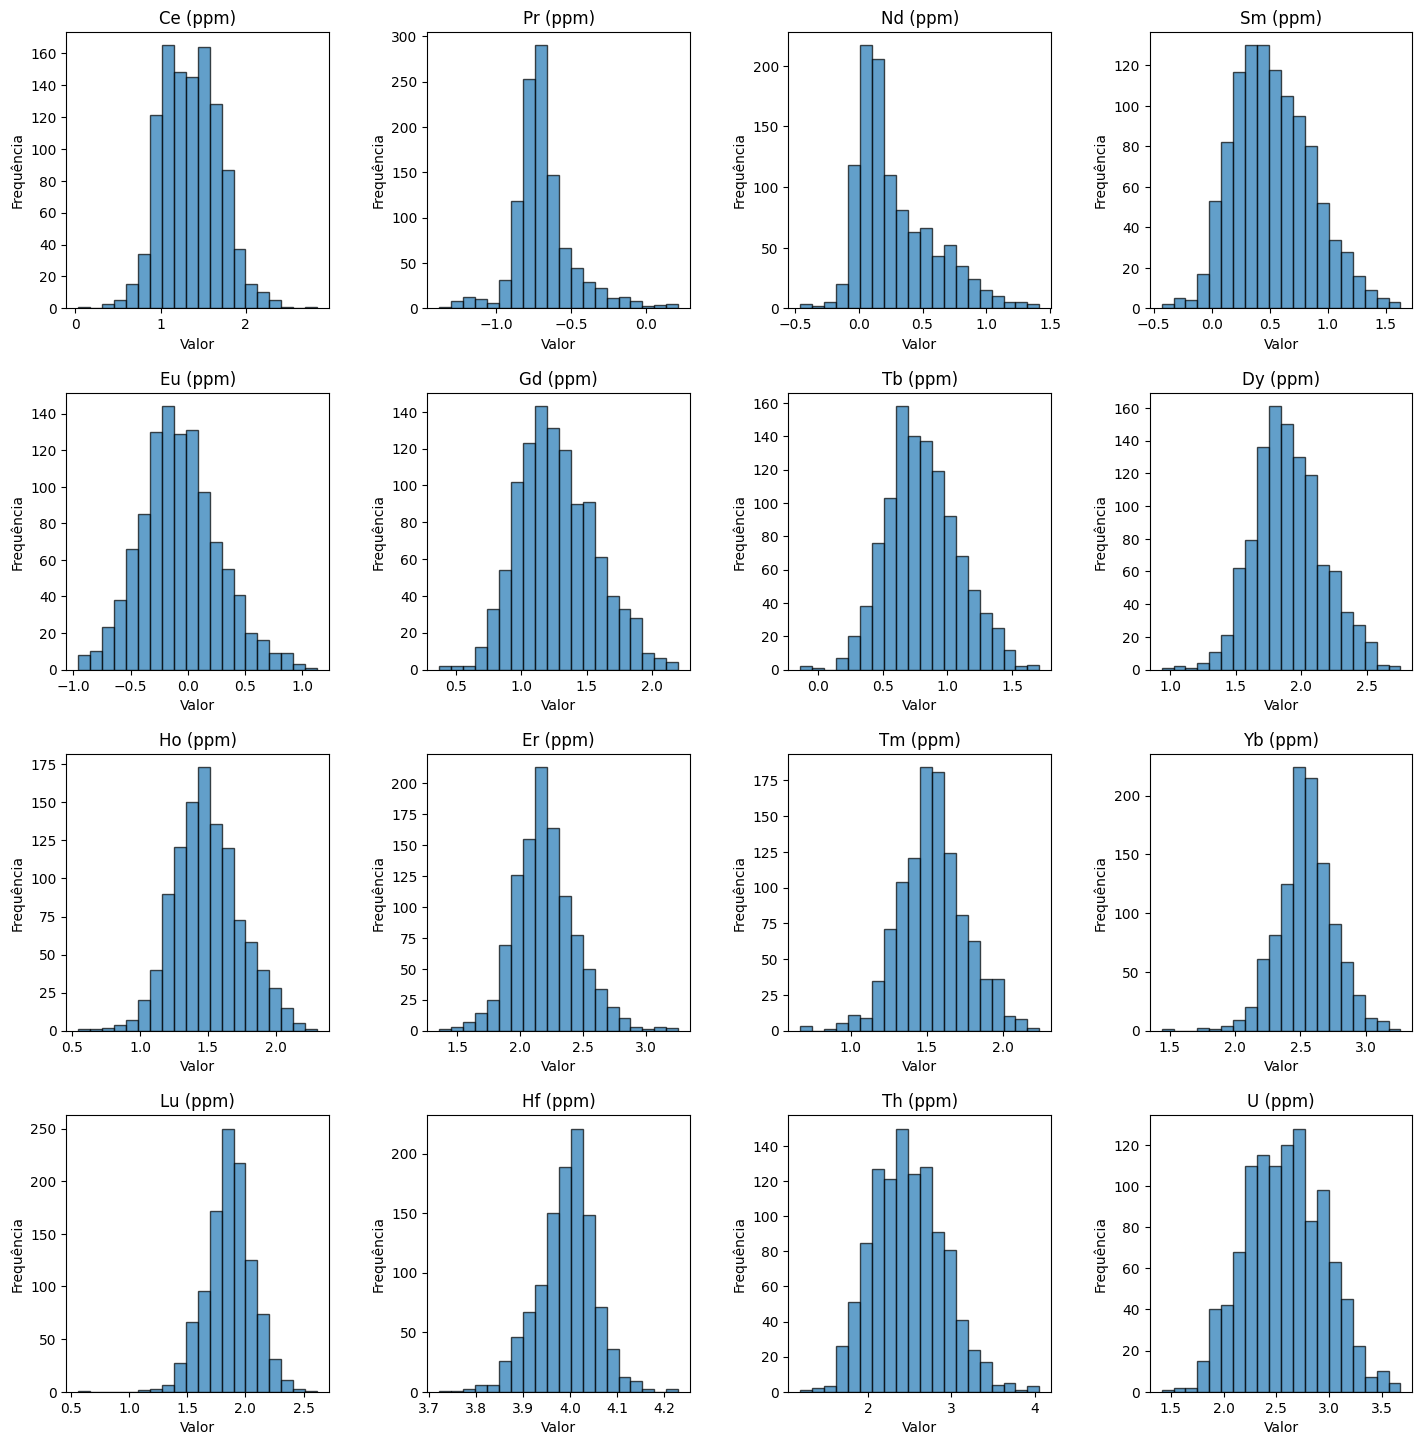

In [ ]:
# Configurando o número de colunas e linhas para os subplots.
# O número de colunas é fixo em 4, e o número de linhas é calculado com base no número total de colunas.
n_cols = 4
n_rows = int(len(colunas) / n_cols) + (len(colunas) % n_cols > 0)

# Criando uma figura e um conjunto de subgráficos (subplots).
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 15))

# Ajustando o espaço entre os subgráficos para evitar sobreposição.
plt.tight_layout(pad=4)

# Loop para criar histogramas para cada coluna (oligoelemento).
for i, nome_coluna in enumerate(colunas):
    row = i // n_cols  # Determinando a linha do subplot
    col_idx = i % n_cols  # Determinando a coluna do subplot
    # Plotando o histograma para a coluna atual
    axs[row, col_idx].hist(dados_teste_normalizados[nome_coluna], bins=20, edgecolor='black', alpha=0.7)
    axs[row, col_idx].set_title(nome_coluna)  # Definindo o título do subplot
    axs[row, col_idx].set_ylabel('Frequência')  # Definindo o rótulo do eixo Y
    axs[row, col_idx].set_xlabel('Valor')  # Definindo o rótulo do eixo X

# Se o número total de colunas não for um múltiplo do número de colunas do subplot, remove os eixos extras.
if len(colunas) % n_cols != 0:
    for j in range(len(colunas) % n_cols, n_cols):
        fig.delaxes(axs[n_rows - 1, j])  # Removendo os eixos extras

# Mostrando a figura completa com todos os subplots
plt.show()

#**MACHINE LEARNING**

##**PREVISÃO COM SVM**

In [ ]:
#previsao SVM
y_pred_svm_teste = modelo_svm.predict(dados_teste_normalizados)

##PREVISÃO COM RANDOM FOREST

In [ ]:
#previsao RF
y_pred_rf_teste = modelo_rf.predict(dados_teste_normalizados)

In [ ]:
dados_teste['pred_rf'] = y_pred_rf_teste

In [ ]:
dados_teste['pred_svm'] = y_pred_svm_teste

In [ ]:
dados_teste.columns

Index(['No.', 'Area', 'Location', 'Latitude (°)', 'Longitude (°)',
       'Sample No.', 'Spot No.', 'Description', 'Age (Ma)', '2σ', 'Reference',
       'P (ppm)', 'Ti (ppm)', 'Fe (ppm)', 'Zr (ppm)', 'Rb (ppm)', 'Y (ppm)',
       'Nb (ppm)', 'Ba (ppm)', 'La (ppm)', 'Ce (ppm)', 'Pr (ppm)', 'Nd (ppm)',
       'Sm (ppm)', 'Eu (ppm)', 'Gd (ppm)', 'Tb (ppm)', 'Dy (ppm)', 'Ho (ppm)',
       'Er (ppm)', 'Tm (ppm)', 'Yb (ppm)', 'Lu (ppm)', 'Hf (ppm)', 'Th (ppm)',
       'U (ppm)', 'Th/U', 'logLa (ppm)', 'logCe (ppm)', 'logPr (ppm)',
       'logNd (ppm)', 'logSm (ppm)', 'logEu (ppm)', 'logGd (ppm)',
       'logTb (ppm)', 'logDy (ppm)', 'logHo (ppm)', 'logEr (ppm)',
       'logTm (ppm)', 'logYb (ppm)', 'logLu (ppm)', 'logTh (ppm)',
       'logU (ppm)', 'Results of SVM', 'Results of RF', 'pred_rf', 'pred_svm'],
      dtype='object')

In [ ]:
df = dados_teste

In [ ]:
# criando um intervalo de 5 milhões de anos para a coluna 'Age (Ma)'
bins = list(range(10, 140, 5))
labels = [f"{i}-{i+5}" for i in bins[:-1]]

# classificando as idades nesse intervalo
df['Age_bin'] = pd.cut(df['Age (Ma)'], bins=bins, labels=labels, right=False)

# Função para calcular a porcentagem de amostras "fertile"
def calc_percentage(s):
    return (s.sum() / len(s)) * 100


# criando a tabela de resumo
summary = df.groupby('Age_bin').agg(
    n=('Age (Ma)', 'size'),
    SVM_percentage=('pred_svm', calc_percentage),
    RF_percentage=('pred_rf', calc_percentage)
)

# reajustando a tabela
summary.reset_index(inplace=True)
summary['Age (Ma)'] = summary['Age_bin'].astype(str)
summary.drop('Age_bin', axis=1, inplace=True)

In [ ]:
summary

,n,SVM_percentage,RF_percentage,Age (Ma)
0,23,82.608696,91.304348,10-15
1,112,99.107143,96.428571,15-20
2,29,96.551724,89.655172,20-25
3,11,81.818182,100.000000,25-30
4,11,54.545455,81.818182,30-35
5,4,75.000000,75.000000,35-40
6,50,76.000000,66.000000,40-45
7,190,66.842105,56.842105,45-50
8,124,34.677419,25.000000,50-55
9,63,22.222222,6.349206,55-60


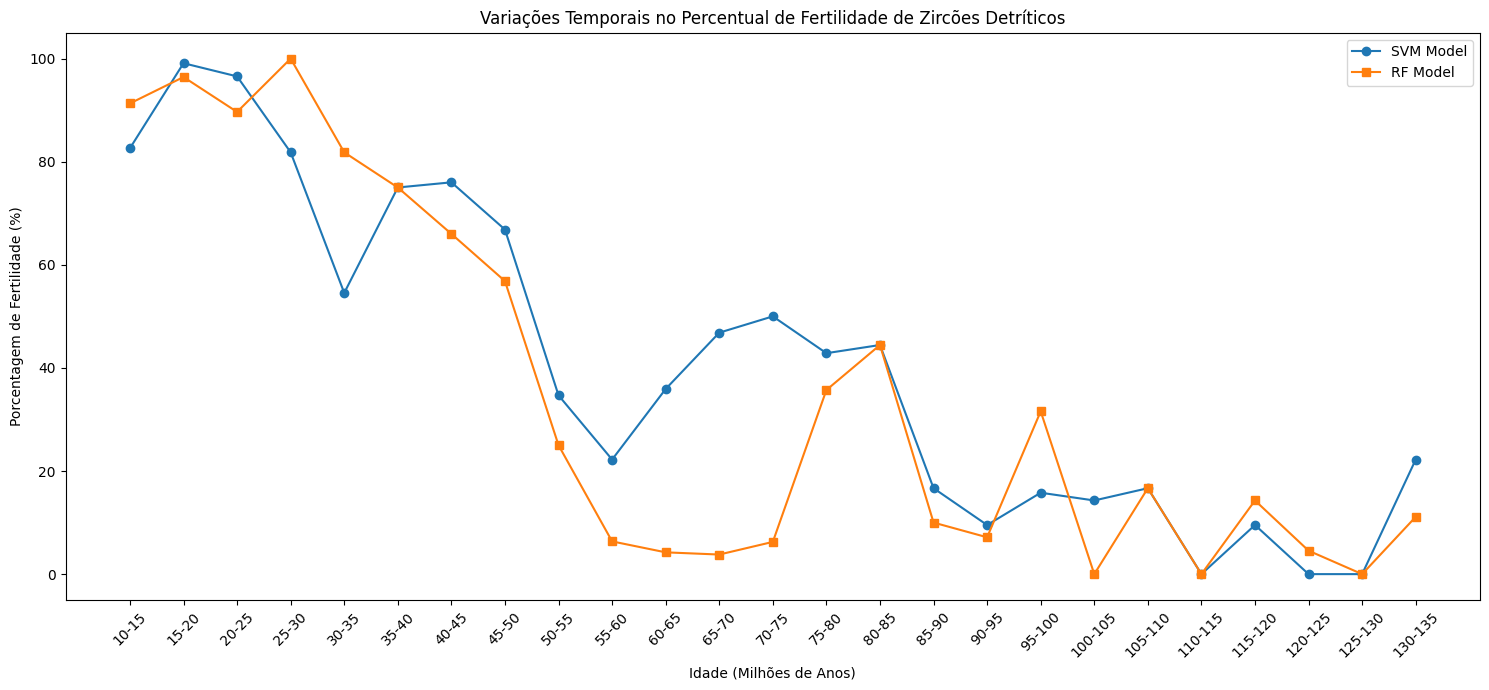

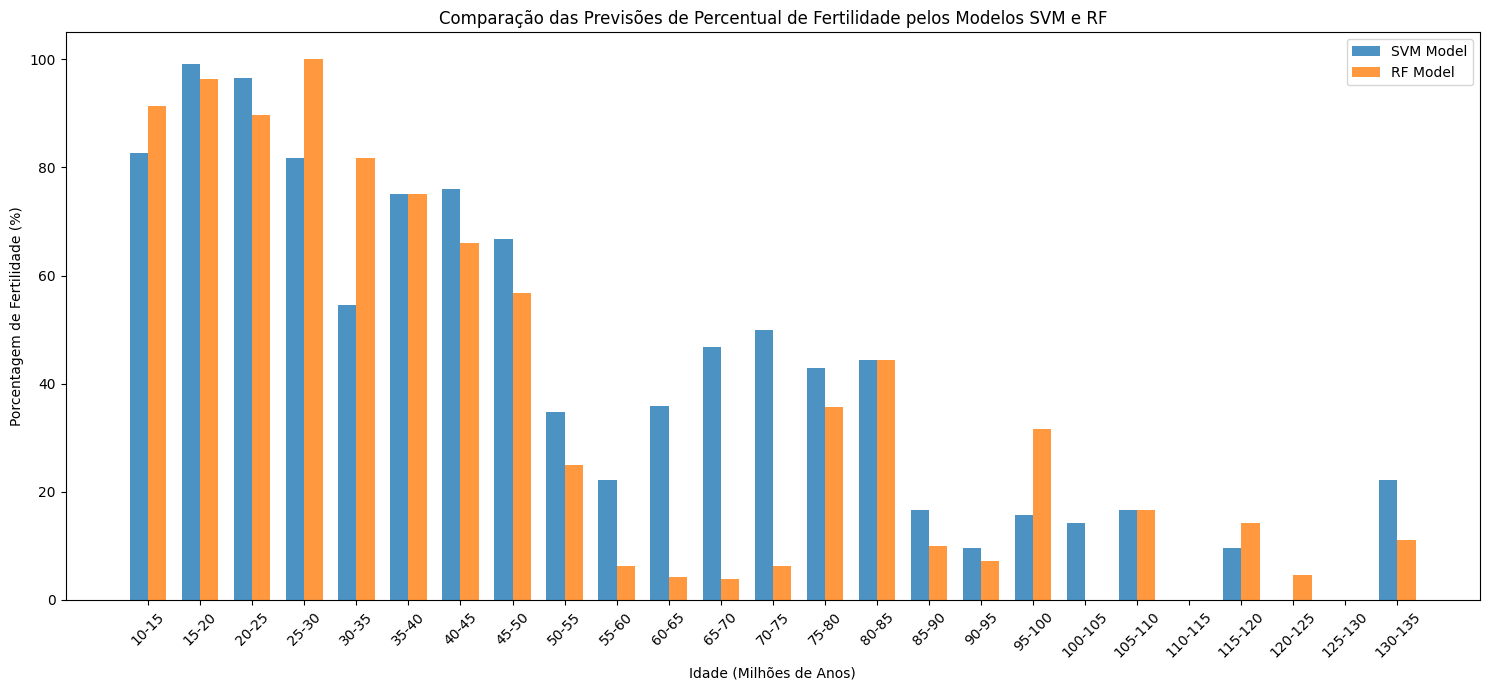

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(summary['Age (Ma)'], summary['SVM_percentage'], marker='o', label='SVM Model')
plt.plot(summary['Age (Ma)'], summary['RF_percentage'], marker='s', label='RF Model')
plt.title('Variações Temporais no Percentual de Fertilidade de Zircões Detríticos')
plt.xlabel('Idade (Milhões de Anos)')
plt.ylabel('Porcentagem de Fertilidade (%)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

bar_width = 0.35
index = np.arange(len(summary['Age (Ma)']))

plt.figure(figsize=(15,7))
bar1 = plt.bar(index, summary['SVM_percentage'], bar_width, label='SVM Model', alpha=0.8)
bar2 = plt.bar(index + bar_width, summary['RF_percentage'], bar_width, label='RF Model', alpha=0.8)

plt.xlabel('Idade (Milhões de Anos)')
plt.ylabel('Porcentagem de Fertilidade (%)')
plt.title('Comparação das Previsões de Percentual de Fertilidade pelos Modelos SVM e RF')
plt.xticks(index + bar_width / 2, summary['Age (Ma)'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Resumo dos Resultados:

- **Modelo SVM:** 49.22% classificados como férteis
- **Modelo RF:** 36.50% classificados como férteis

## Análise Temporal da Fertilidade de Zircões Detríticos

Assim como no artigo, realizamos a classificação da fertilidade metalogenética de zircões detríticos em intervalos de 5 milhões de anos, descobrindo uma divisão notável no percentual de fertilidade antes e após os 50 Ma. Os resultados revelam uma elevação na fertilidade metalogenética após este ponto, que coincide com importantes transformações tectônicas registradas na história geológica da região. **Esta mudança é corroborada por métodos de datação que indicam um auge nas atividades metalogenéticas no período entre 25 Ma e 10 Ma.**

As evidências apontam para uma associação entre a intensificação da fertilidade dos magmas e os eventos tectônicos resultantes da colisão Índia-Ásia. Este resultado é um importante norte para as futuras psquisas, sugerindo que **o foco deve ser as rochas magmáticas formadas nos últimos 50 Ma, especialmente após os 25 Ma.**

### Fontes:
- Hu et al., 2017
- Zhang et al., 2017
- Cheng et al., 2018a, 2018b
- Zhou et al., 2022

## A importância do Machine Learning na Geologia

Este estudo destaca a importância de integrar análises de ML com dados geológicos e geoquímicos para uma exploração mineral eficaz e para um entendimento mais profundo dos processos metalogenéticos, permitindo um nível de análise e precisão que beneficia tanto a pesquisa acadêmica quanto a aplicação prática na indústria de mineração.
